# Capstone Project - Predicting Energy Profile for Branded Food

## Section 1 - Introduction

<i> We see multiple branded food categories that have different energy and nutrient profiles - some of these branded food items also highlight multiple benefits (examples include low sugar, high fiber etc.) - the presence of so many data points can make it difficult for consumers to make an informed choice in a short time.<br>

<i>Machine learning concepts can be applied on a dataset that contains nutritional information and additional supporting factors for a large variety of branded food items available in the market today to understand which nutrients determine the overall calorie value for a particular food item and also predict the energy profile based on the nutrient composition.<br>

<i>The objectives of this project include:<br>
<i> a) Review the data provided in the US Department of Agriculture (USDA)<br>
<i> b) Prepare the data provided by USDA for use in this project<br>
<i> c) Review the data and make necessary transformations through Exploratory Data Analysis (EDA)<br>
<i> d) Build a machine learning model that shows the key nutrients influencing the overall energy / calorie value of foods<br>
<i> e) Evaluate alternate models and refine the chosen model to predict the energy value based on the nutrient profile<br>
<i> f) Predict the potential nutrient profile for 2-3 real world food labels<br>

## Section 2 - Brief Description about the Data Source

<i> The data for this project comes from the ["FoodData Central" (FDC)](https://fdc.nal.usda.gov/) section in the US Department of Agriculture (USDA) website. The FDC webpage hosts comprehensive datasets with detailed information about different food products - the data has been gathered from different sources including Foundation Foods, Experimental Foods, and the USDA Global Branded Food Products Database.


<i> For this project, the focus is on analyzing the branded food data provided by FDC. The data can be downloaded [here](https://fdc.nal.usda.gov/download-datasets) and has multiple CSV files.


## Section 3 - High Level Approach

<i> In order to build a baseline machine learning model, this document largely follows the CRISP-DM framework. The below phases would be executed:<br><br>
<i> <u>Phase 0: Data Acquisition</u>:  This phase involves reviewing the individual CSV files downloaded from USDA's FDC website and consolidating them into a single CSV file for this project<br><br>
<i><u>Phase 1: Data Understanding</u>: This phase imports the CSV file prepared above and does an initial exploration for understanding the columns and discovering patterns that need to be addressed (e.g. columns with unique / constant values, columns with large proportion of missing values, high level distribution properties of columns like mean and varance etc.)<br><br>
<i><u>Phase 2: Data Cleaning and Preparation</u>: This phase leverages multiple exploratory data analysis (EDA) techniques to make necessary changes to the dataset to make it more usable for building machine learning models. The focus areas here would include addressing missing values for critical columns, removing outliers if necessary, encoding critical categorical columns and finalizing the key columns needed for building the model. The end portion of this would involve correlating the different fields to find patterns / relationships.<br><br>
<i><u>Phase 3: Modeling</u>: The prepared data would then be used for training multiple regression models, taking linear regression as the baseline<br><br>
<i><u>Phase 4: Model Evaluation and Hyperparameter Tuning</u>: The trained models are then evaluated after which the target model is chosen for hyperparameter tuning<br><br>
<i><u>Phase 5: Conclusion, Deployment and Key Insights</u>: The final model is then reviewed to check relative importance of individual features, document key insights and also test the model with a few real life examples<br><br>

## Section 4: Data Preparation Phase [Phase 0]

<i> When we download the ZIP archive from the Branded Food row (CSV) in FDC's <a href="https://fdc.nal.usda.gov/download-datasets">Latest Downloads</a> page, there are multiple CSV files present. For this exercise, the below files are used:<br><br>
<i>a) branded_food.csv: This file has the data of all branded food items (unique FDC ID, company name, branded food name, branded food category, serving size and ingredient list. )<br><br>
<i>b) nutrient.csv: This file has a list of nutrients along with their unique nutrient IDs and unit name<br><br>
<i>c) food_nutrient.csv: This file shows the list of nutrients (indicated by nutrient IDs) for each branded food item (indicated by their FDC ID) and the amount of nutrients present in for each food ID - nutrient ID mapping<br><br>
<i>For this exercise, the target dataset should have columns that show the food category, food name, serving size, serving size unit, energy and individual columns for each nutrient. Since the above files are in different datasets, a Google Cloud BigQuery query (data_prep_bq.sql in the repo) was created that does the below:<br><br>
<i>1) Join the nutrient.csv and food_nutrient.csv file to show the nutrient name along with the nutrient ID for each food ID<br><br>
<i>2) Left join branded_food.csv data with the data from (1) to create a table that consolidates all the required data fields (food ID and name, food category, nutrient name, serving size and invidual nutrient quantities)<br><br>
<i>3) Pivot the table from (2) so that individual nutrients come up as columns instead of rows.<br>
The final table created is then queried and downloaded - the output of this query can be viewed in the file 'final_result_v2.csv' that will be used in the subsequent phases.<br>

## Section 5: Data Understanding [Phase 1]

<i> The objective of this phase is to load the data, review its schema and fields and identify the potential efforts needed to clean and prepare the data for model building

### a) Load Data and Review the Schema

<u>Step 1: Import Required Libraries<u>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

<u>Step 2: Load the Data File & List Columns</u>

In [2]:
df_raw = pd.read_csv('final_result_v2.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df_raw.head()

,fdc_id,brand_name,subbrand_name,food_name,branded_food_category,market_country,serving_size,serving_size_unit,Fatty_acids__total_saturated_G,Sugars__added_G,Fatty_acids__total_trans_G,Sodium__Na_MG,Thiamin_MG,Fiber__total_dietary_G,Vitamin_D__D2___D3___International_Units_IU,Protein_G,Pantothenic_acid_MG,Vitamin_C__total_ascorbic_acid_MG,Total_lipid__fat__G,Cholesterol_MG,Potassium__K_MG,Carbohydrate__by_difference_G,Total_Sugars_G,Calcium__Ca_MG,Iron__Fe_MG,Vitamin_B-6_MG,Energy_KCAL,Fatty_acids__total_polyunsaturated_G,Vitamin_A__IU_IU,Fatty_acids__total_monounsaturated_G,Folic_acid_UG,Vitamin_E__alpha-tocopherol__MG,Selenium__Se_UG,Manganese__Mn_MG,Niacin_MG,Phosphorus__P_MG,Zinc__Zn_MG,Riboflavin_MG,Folate__total_UG,Fiber__soluble_G,Vitamin_E_MG_ATE,Magnesium__Mg_MG,Vitamin_K__phylloquinone__UG,Vitamin_B-12_UG,Total_sugar_alcohols_G,Copper__Cu_MG,Carbohydrate__other_G,Fiber__insoluble_G,Iodine__I_UG,Water_G,Vitamin_E__label_entry_primarily__IU,Starch_G,Ash_G,Folate__DFE_UG,Molybdenum__Mo_UG,Chromium__Cr_UG,Biotin_UG,Energy_kJ,Chlorine__Cl_MG,Valine_G,Choline__total_MG,Vitamin_D__D2___D3__UG,Vitamin_A_UG,Vitamin_E_MG,Vitamin_A__RAE_UG,Caffeine_MG,Glycine_G,Lysine_G,Cystine_G,Isoleucine_G,Sugars__Total_G,Vitamin_D3__cholecalciferol__UG,Fluoride__F_UG,Alanine_G,Tryptophan_G,Methionine_G,Aspartic_acid_G,Leucine_G,Phenylalanine_G,Lactose_G,Glutamic_acid_G,Xylitol_G,Tyrosine_G,Histidine_G,Arginine_G,Serine_G,Threonine_G,Proline_G,Alcohol__ethyl_G
0,2318226,Brakebush®,NaN,"Chicken, FC Unbreaded Wing Jumbo Naked Wings N...",Meat/Poultry/Other Animals Prepared/Processed,United States,117.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1325396,GREAT VALUE,NaN,"PEANUT SWEET & SALTY CHEWY GRANOLA BARS, PEANUT","Snack, Energy & Granola Bars",United States,35.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1217881,MRS. PAUL'S,NaN,"CRUNCHY BREADED FISH FOR SANDWICHES FILLETS, C...",Frozen Fish & Seafood,United States,85.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1249237,ORRINGTON FARMS,NaN,"ORIGINAL SEASONED BREADING FOR CHICKEN, ORIGINAL","Seasoning Mixes, Salts, Marinades & Tenderizers",United States,18.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2308603,QUAKER,CHEWY,"CHOCOLATE CHIP GRANOLA BARS, CHOCOLATE CHIP","Snack, Energy & Granola Bars",United States,24.0,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215740 entries, 0 to 215739
Data columns (total 89 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   fdc_id                                       215740 non-null  int64  
 1   brand_name                                   158192 non-null  object 
 2   subbrand_name                                13746 non-null   object 
 3   food_name                                    215740 non-null  object 
 4   branded_food_category                        214530 non-null  object 
 5   market_country                               215740 non-null  object 
 6   serving_size                                 215740 non-null  float64
 7   serving_size_unit                            214474 non-null  object 
 8   Fatty_acids__total_saturated_G               196307 non-null  float64
 9   Sugars__added_G                              87161 non-null

<i>The above output indicates that there are 89 columns and 215,740 rows. There are also multiple columns with a lot of missing values - however some critical columns like Energy, Carbohydrates, Protein, Fatty Acids, Food Category and Serving Size have a good chunk of values populated.<i>

In [4]:
df_raw.describe().map('{:,.2f}'.format)

,fdc_id,serving_size,Fatty_acids__total_saturated_G,Sugars__added_G,Fatty_acids__total_trans_G,Sodium__Na_MG,Thiamin_MG,Fiber__total_dietary_G,Vitamin_D__D2___D3___International_Units_IU,Protein_G,Pantothenic_acid_MG,Vitamin_C__total_ascorbic_acid_MG,Total_lipid__fat__G,Cholesterol_MG,Potassium__K_MG,Carbohydrate__by_difference_G,Total_Sugars_G,Calcium__Ca_MG,Iron__Fe_MG,Vitamin_B-6_MG,Energy_KCAL,Fatty_acids__total_polyunsaturated_G,Vitamin_A__IU_IU,Fatty_acids__total_monounsaturated_G,Folic_acid_UG,Vitamin_E__alpha-tocopherol__MG,Selenium__Se_UG,Manganese__Mn_MG,Niacin_MG,Phosphorus__P_MG,Zinc__Zn_MG,Riboflavin_MG,Folate__total_UG,Fiber__soluble_G,Vitamin_E_MG_ATE,Magnesium__Mg_MG,Vitamin_K__phylloquinone__UG,Vitamin_B-12_UG,Total_sugar_alcohols_G,Copper__Cu_MG,Carbohydrate__other_G,Fiber__insoluble_G,Iodine__I_UG,Water_G,Vitamin_E__label_entry_primarily__IU,Starch_G,Ash_G,Folate__DFE_UG,Molybdenum__Mo_UG,Chromium__Cr_UG,Biotin_UG,Energy_kJ,Chlorine__Cl_MG,Valine_G,Choline__total_MG,Vitamin_D__D2___D3__UG,Vitamin_A_UG,Vitamin_E_MG,Vitamin_A__RAE_UG,Caffeine_MG,Glycine_G,Lysine_G,Cystine_G,Isoleucine_G,Sugars__Total_G,Vitamin_D3__cholecalciferol__UG,Fluoride__F_UG,Alanine_G,Tryptophan_G,Methionine_G,Aspartic_acid_G,Leucine_G,Phenylalanine_G,Lactose_G,Glutamic_acid_G,Xylitol_G,Tyrosine_G,Histidine_G,Arginine_G,Serine_G,Threonine_G,Proline_G,Alcohol__ethyl_G
count,"215,740.00","215,740.00","196,307.00","87,161.00","194,369.00","202,747.00","39,506.00","195,694.00","78,437.00","203,354.00","8,158.00","99,803.00","202,152.00","193,468.00","125,507.00","202,706.00","202,216.00","192,494.00","191,148.00","26,971.00","200,438.00","48,390.00","94,771.00","48,445.00","18,116.00",418.00,"2,435.00","2,799.00","37,082.00","23,997.00","21,034.00","37,897.00","15,102.00","6,845.00",672.00,"16,464.00","1,207.00","20,690.00","7,240.00","5,391.00","3,663.00","8,554.00","1,285.00",865.00,873.00,12.00,868.00,470.00,137.00,72.00,302.00,1.00,49.00,5.00,164.00,"17,507.00","4,597.00",654.00,"1,352.00",26.00,5.00,5.00,5.00,1.00,75.00,11.00,13.00,5.00,5.00,5.00,5.00,5.00,5.00,8.00,5.00,2.00,4.00,5.00,5.00,5.00,5.00,5.00,1.00
mean,"1,639,340.07",73.78,3.79,15.61,0.02,"1,107.00",0.73,4.12,"1,541.49",9.15,3.03,6.56,10.15,24.75,358.86,45.99,18.23,126.26,4.66,1.10,302.30,2.30,"1,045.17",3.43,294.98,6.54,32.48,1.36,8.24,362.20,6.67,1.19,"110,119.52",3.10,10.82,88.82,24.44,"21,444.11",10.04,0.63,39.80,5.32,56.04,9.30,"14,104.65",43.33,2.49,242.81,26.39,72.79,300.12,517.00,226.08,0.44,665.49,"3,443.88",279.22,5.01,161.40,1.38,0.37,0.30,0.15,0.34,20.27,0.53,"23,076.92",0.41,0.13,0.17,0.64,0.75,0.50,0.37,2.73,3.00,0.35,0.25,0.54,0.42,0.32,0.94,7.50
std,"691,672.88",58.39,5.98,19.10,0.59,"37,472.37",3.26,5.46,"420,086.10",9.46,4.36,32.75,14.25,907.79,"6,963.73",43.50,20.35,"1,574.47",114.67,1.11,270.70,2.97,"91,695.55",4.91,"5,558.17",5.11,175.72,2.01,22.56,"8,842.99",5.76,102.74,"3,923,249.17",3.10,16.23,65.23,61.65,"1,170,379.57",10.55,0.95,18.55,4.29,39.65,10.85,"55,384.64",4.02,1.59,215.30,19.75,43.81,"1,926.89",nan,146.33,0.02,"1,063.16","385,752.96","9,633.78",6.65,99.50,2.58,0.01,0.01,0.01,nan,15.96,1.75,"56,330.07",0.02,0.00,0.01,0.01,0.04,0.02,1.05,0.17,1.41,0.00,0.00,0.01,0.01,0.00,0.07,nan
min,"344,620.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.50,0.00,38.50,0.00,12.00,0.00,0.00,0.00,517.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.35,0.29,0.13,0.34,0.00,0.00,0.00,0.37,0.13,0.15,0.64,0.68,0.46,0.00,2.41,2.00,0.35,0.24,0.54,0.40,0.31,0.82,7.50
25%,"1,139,496.75",35.00,0.00,3.80,0.00,67.00,0.00,0.70,0.00,4.17,0.82,0.00,1.86,0.00,107.00,22.33,5.00,31.00,0.40,0.53,179.00,0.00,0.00,0.00,61.00,1.00,4.00,0.00,3.85,113.00,3.21,0.25,85.00,2.00,4.00,53.00,1.70,1.43,0.00,0.27,25.00,2.00,30.00,3.00,0.00,38.50,1.60,95.00,12.00,54.75,10.00,517.00,146.00,0.44,57.00,0.00,0.00,1.99,79.00,0.00,0.38

In [5]:
# 3a) Review the number of Null values in each field
sourceData_nullCounts = df_raw.isnull().sum(axis=0)
sourceData_nullCount_pct = sourceData_nullCounts / len(df_raw)
pd.set_option('display.max_rows', None)
pd.DataFrame({'Null Count': sourceData_nullCounts,'Null Count %': sourceData_nullCount_pct}).sort_values('Null Count %',ascending=False)

,Null Count,Null Count %
Isoleucine_G,215739,0.999995
Alcohol__ethyl_G,215739,0.999995
Energy_kJ,215739,0.999995
Xylitol_G,215738,0.999991
Tyrosine_G,215736,0.999981
Glutamic_acid_G,215735,0.999977
Cystine_G,215735,0.999977
Arginine_G,215735,0.999977
Valine_G,215735,0.999977
Aspartic_acid_G,215735,0.999977


<i>From the above outputs, it shows that a lot of nutrient columns have a large number of missing values which would not be useful when building the model. Hence these columns can be dropped.<br>

<i> The below code removes those columns that have 80% or more records missing

In [6]:
df_modified = df_raw.dropna(axis=1,thresh=(1-0.8)*len(df_raw))
sourceData_nullCounts = df_modified.isnull().sum(axis=0)
sourceData_nullCount_pct = sourceData_nullCounts / len(df_modified)
pd.set_option('display.max_rows', None)
pd.DataFrame({'Null Count': sourceData_nullCounts,'Null Count %': sourceData_nullCount_pct}).sort_values('Null Count %',ascending=False)

,Null Count,Null Count %
Fatty_acids__total_polyunsaturated_G,167350,0.775702
Fatty_acids__total_monounsaturated_G,167295,0.775447
Vitamin_D__D2___D3___International_Units_IU,137303,0.636428
Sugars__added_G,128579,0.595991
Vitamin_A__IU_IU,120969,0.560717
Vitamin_C__total_ascorbic_acid_MG,115937,0.537392
Potassium__K_MG,90233,0.418249
brand_name,57548,0.266747
Iron__Fe_MG,24592,0.113989
Calcium__Ca_MG,23246,0.107750


<i> The below code checks for any uplicate rows - as the output indicates, there are no duplicates. Subsequently it is also verified that the column fdc_id has all unique values (215,740) and the column market_country has only 2 unique values - hence these 2 also need not be factored for model  building <br>

In [7]:
# 3b) Check if the dataset has any duplicate values
duplicate_rows = df_modified[df_modified.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [fdc_id, brand_name, food_name, branded_food_category, market_country, serving_size, serving_size_unit, Fatty_acids__total_saturated_G, Sugars__added_G, Fatty_acids__total_trans_G, Sodium__Na_MG, Fiber__total_dietary_G, Vitamin_D__D2___D3___International_Units_IU, Protein_G, Vitamin_C__total_ascorbic_acid_MG, Total_lipid__fat__G, Cholesterol_MG, Potassium__K_MG, Carbohydrate__by_difference_G, Total_Sugars_G, Calcium__Ca_MG, Iron__Fe_MG, Energy_KCAL, Fatty_acids__total_polyunsaturated_G, Vitamin_A__IU_IU, Fatty_acids__total_monounsaturated_G]
Index: []


In [8]:
#Count the number of unique values in fdc_id and market_country columns since they could potentially be unique identifiers
print(df_modified['fdc_id'].nunique())
print(df_modified['market_country'].nunique())

215740
2


## Section 6: Data Cleaning and Preparation [Phase 2]

<i>This phase includes all the steps for cleaning and preparing the data for model development. The branded food category and serving size unit columns will be reviewed first, after which the numerical columns can be analyzed<br>

### a) Analyze the Branded Food Category Column

<i><u>Step 1: Review the Branded Food Category Column </u></i>

<i> The branded food category column indicates the category a food item belongs to (e.g. Cereal, Breads etc.). If this column has to be used post encoding, the column should have as less unique values as possible.<br>

In [9]:
#Review the branded food category column
print(df_modified['branded_food_category'].value_counts().to_frame())

                                                    count
branded_food_category                                    
Snack, Energy & Granola Bars                        35941
Yogurt                                              32376
Breads & Buns                                       27584
Cereal                                              19162
Ice Cream & Frozen Yogurt                            9879
Processed Cereal Products                            8456
Chocolate                                            5591
Cookies & Biscuits                                   5496
Croissants, Sweet Rolls, Muffins & Other Pastries    4246
Candy                                                4195
Ketchup, Mustard, BBQ & Cheese Sauce                 4028
Bread & Muffin Mixes                                 3911
Popcorn, Peanuts, Seeds & Related Snacks             3457
Cake, Cookie & Cupcake Mixes                         3420
Frozen Appetizers & Hors D'oeuvres                   3266
Frozen Pancake

<i> From the above we can observe the below:<br>
<i> a) There seem to be a lot of categories that highly overlap (e.g. 'Baby/Infant  Foods/Beverages' and 'Baby/Infant – Foods/Beverages'). There is an oportunity to consolidate this as well.<br>
<i>b) There are a lot of categories with very few rows. Since there are 215K rows, we can probably remove those food categories that have less than 100 entries<br>

<i><u>Step 2: Rationalize the Column</u>


<i> The above list of unique branded food category values was reviewed separately during which revised category names were identified. The revised mapping can be viewed in the file 'Capstone - Food Category Mapping - Sheet1.csv'.<br><br>
<i> In this step, we will read this CSV file and update the existing food categories to their revised categories

In [10]:

df_revised_food_categories = pd.read_csv("Capstone - Food Category Mapping - Sheet1.csv")
df_revised_food_categories.head()

,branded_food_category,revised_food_category
0,Alcohol,Alcohol
1,Alcoholic Beverages,Alcoholic Beverages
2,All Noodles,All Noodles
3,Baby/Infant Foods/Beverages,Baby/Infant Foods/Beverages
4,Baby/Infant – Foods/Beverages,Baby/Infant Foods/Beverages


In [11]:
df_modified['branded_food_category']=df_modified['branded_food_category'].replace(df_revised_food_categories.set_index('branded_food_category')['revised_food_category'].to_dict())
print(df_modified['branded_food_category'].value_counts().to_frame())

                                                    count
branded_food_category                                    
Bread - Incl. Buns And Rolls                        37896
Snack, Energy & Granola Bars                        35941
Yogurt                                              35102
Cereal                                              19636
Ice Cream & Frozen Yogurt                            9888
Processed Cereal Products                            8456
Cookies & Biscuits                                   5665
Chocolate                                            5591
Candy                                                4195
Ketchup, Mustard, BBQ & Cheese Sauce                 4028
Popcorn, Peanuts, Seeds & Related Snacks             3457
Baking/Cooking Mixes (Shelf Stable)                  3452
Frozen Appetizers & Hors D'oeuvres                   3266
Frozen Pancakes, Waffles, French Toast & Crepes      3137
Meat/Poultry/Other Animals                           2554
Chips, Pretzel

/var/tmp/ipykernel_3926/3896262617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified['branded_food_category']=df_modified['branded_food_category'].replace(df_revised_food_categories.set_index('branded_food_category')['revised_food_category'].to_dict())


<i><u>Step 3: Remove Rows where the Food Category Frequency is Less than 100

<i> Even after the above cleanup, there are multiple food categories which have very low values. For the purpose of this model building, category values with less than 100 entries will be removed.</i>

In [12]:
food_category_list = df_modified['branded_food_category'].value_counts()
list_to_remove = food_category_list[food_category_list < 100].index.tolist()
print(list_to_remove)

['Breakfast Sandwiches, Biscuits & Meals', 'Other Cooking Sauces', 'Oriental, Mexican & Ethnic Sauces', 'Herbs & Spices', 'Prepared Wraps and Burittos', 'Powdered Drinks', 'Non Alcoholic Beverages', 'Vegetables – Prepared/Processed', 'Bacon, Sausages & Ribs', 'Canned Soup', 'Vegetable and Lentil Mixes', 'Canned & Bottled Beans', 'Soda', 'Canned Meat', 'Poultry, Chicken & Turkey', 'Grains/Flour', 'Entrees, Sides & Small Meals', 'Vegetable & Cooking Oils', 'Prepared Pasta & Pizza Sauces', 'Flavored Rice Dishes', 'Sauces/Spreads/Dips/Condiments', 'Sausages, Hotdogs & Brats', 'Frozen Bacon, Sausages & Ribs', 'Other Frozen Meats', 'Salads', 'Canned Condensed Soup', 'Ready-Made Combination Meals', 'Canned Vegetables', 'Dinnex Mixes', 'Green Supplements', 'Meat/Poultry/Other Animals Sausages  Prepared/Processed', 'Other Condiments', 'Snack Bars', 'Chili & Stew', 'Tea Bags', 'Prepared/Preserved Foods Variety Packs', 'Alcohol', 'Plant Based Water', 'Specialty Formula Supplements', 'Canned Seafo

In [13]:
df_modified = df_modified[~df_modified['branded_food_category'].isin(list_to_remove)]
count_nas = df_modified['branded_food_category'].isna().sum()
print (f"Number of rows with no value for branded food category is: " + str(count_nas))
df_modified = df_modified.dropna(subset=['branded_food_category'])
print(df_modified['branded_food_category'].value_counts().to_frame())

Number of rows with no value for branded food category is: 1210
                                                 count
branded_food_category                                 
Bread - Incl. Buns And Rolls                     37896
Snack, Energy & Granola Bars                     35941
Yogurt                                           35102
Cereal                                           19636
Ice Cream & Frozen Yogurt                         9888
Processed Cereal Products                         8456
Cookies & Biscuits                                5665
Chocolate                                         5591
Candy                                             4195
Ketchup, Mustard, BBQ & Cheese Sauce              4028
Popcorn, Peanuts, Seeds & Related Snacks          3457
Baking/Cooking Mixes (Shelf Stable)               3452
Frozen Appetizers & Hors D'oeuvres                3266
Frozen Pancakes, Waffles, French Toast & Crepes   3137
Meat/Poultry/Other Animals                        2554
C

<i>The above dataset can now be used for analyzing the next column - serving size unit.

### b) Review and Optimize the Serving Size Unit Column

<i> <u>Step 1: Consolidate the Different Serving Size Units in the Dataset:</u><br>
<i> The serving size unit column may have the same unit reflected as multiple values - hence it would be essential to clean this.

In [14]:
print(df_modified['serving_size_unit'].unique())
print(df_modified['serving_size_unit'].value_counts().to_frame())

['g' 'ml' 'IU' 'GRM' nan 'MG' 'MLT' 'MC' 'GM']
                    count
serving_size_unit        
g                  178998
GRM                 25434
ml                   4367
MG                   1327
IU                    632
MLT                   469
GM                     32
MC                      6


<i> The above output shows that the unit 'grams' is shown in multiple ways ('GRM', 'GM' and 'g'). Similarly milliliters is shown as multiple values ('ml', 'MLT'). Hence the below code snippet cleans this up to use only 'g' and 'ml' respectively. There are also 6 rows with the value 'MC' - these can be removed. There are also rows with serving size unit as 'NA' - this will be analyzed in the next step.<br><br>
<i> Consolidating the different serving size units below based on the above analysis. 

In [15]:
#clean the serving size unit column
df_modified.loc[df_modified['serving_size_unit']=='GRM','serving_size_unit'] = 'g'
df_modified.loc[df_modified['serving_size_unit']=='GM','serving_size_unit'] = 'g'
df_modified.loc[df_modified['serving_size_unit']=='MLT','serving_size_unit'] = 'ml'
print(df_modified['serving_size_unit'].unique())

['g' 'ml' 'IU' nan 'MG' 'MC']


<i>Since there are only 6 rows with serving size unit as 'MC', they can be removed.

In [16]:
#Delete rows with the serving size unit as 'MC'
df_modified = df_modified[df_modified['serving_size_unit'] != 'MC']
print(df_modified['serving_size_unit'].unique())

['g' 'ml' 'IU' nan 'MG']


<i><u>Step 2: Clean Up NA values</u><br>

<i> The below table shows the number of rows with serving sizes marked as NAs, grouped by the branded food category<br>

In [17]:
df_modified[df_modified['serving_size_unit'].isna()]['branded_food_category'].value_counts().to_frame()

,count
branded_food_category,
Yogurt,594
Bread - Incl. Buns And Rolls,171
"Snack, Energy & Granola Bars",116
Cereal,67
Cookies & Biscuits,33
Ice Cream & Frozen Yogurt,26
Frozen Dinners & Entrees,22
Frozen Appetizers & Hors D'oeuvres,17
"Ketchup, Mustard, BBQ & Cheese Sauce",15


<i> The above output shows that "Yogurt" has the maximum number of NA entries in the serving_size_unit column, followed by "Bread - Incl. Buns And Rolls" and "Snack, Energy & Granola Bars". A reasonable option here would be to replace them with the most frequent value within the category 

In [18]:
get_mode = lambda x: x.mode().iat[0]
df_modified['serving_size_unit'] = df_modified['serving_size_unit'].fillna(df_modified.groupby('branded_food_category')['serving_size_unit'].transform(get_mode))
print("Remaining number of rows with missing serving size unit values: " + str(df_modified[df_modified['serving_size_unit'].isna()]['branded_food_category'].sum()))

Remaining number of rows with missing serving size unit values: 0


<i> Now that the branded food category and serving size unit columns have been analyzed and missing values have been updated, the numerical value columns need to be reviewed </i>

### c) Analyzing Key Numerical Columns

<i><u>Step 1: Revisit the Frequency of Missing Values

In [19]:
df_for_correlation = df_modified.copy()
print(df_for_correlation['serving_size_unit'].unique())
df_for_correlation = df_for_correlation.drop(['fdc_id','market_country','brand_name','food_name'],axis=1)
sourceData_nullCounts = df_for_correlation.isnull().sum(axis=0)
sourceData_nullCount_pct = sourceData_nullCounts / len(df_for_correlation)
pd.set_option('display.max_rows', None)
pd.DataFrame({'Null Count': sourceData_nullCounts,'Null Count %': sourceData_nullCount_pct}).sort_values('Null Count %',ascending=True)

['g' 'ml' 'IU' 'MG']


,Null Count,Null Count %
branded_food_category,0,0.000000
serving_size,0,0.000000
serving_size_unit,0,0.000000
Protein_G,12309,0.057920
Sodium__Na_MG,12688,0.059703
Carbohydrate__by_difference_G,12739,0.059943
Total_Sugars_G,13342,0.062781
Total_lipid__fat__G,13500,0.063524
Energy_KCAL,14029,0.066013
Fatty_acids__total_saturated_G,19102,0.089884


<i> Since there are still columns with a significant percentage of missing values, we could ignore them from the model building exercise. Looking at the above output, all columns after "Iron__Fe_MG" have 40%+ values mising - hence we can ignore these columns.

<i><u>Step 2: Review the Distribution of Numerical Columns

In [20]:
#Splitting the numerical columns into 2 lists to break down the computing power needed to do EDA
numerical_columns_1 = ["Protein_G", "Sodium__Na_MG", "Carbohydrate__by_difference_G", "Total_Sugars_G",
                     "Total_lipid__fat__G", "Energy_KCAL", "Fatty_acids__total_saturated_G"]
numerical_columns_2 = ["Fiber__total_dietary_G", "Fatty_acids__total_trans_G", "Cholesterol_MG", 
                     "Calcium__Ca_MG", "Iron__Fe_MG"]
#drop other columns since they have a large volume of NAN values
df_for_correlation = df_for_correlation.drop(columns = ['Potassium__K_MG','Vitamin_C__total_ascorbic_acid_MG','Vitamin_A__IU_IU','Sugars__added_G','Vitamin_D__D2___D3___International_Units_IU','Fatty_acids__total_monounsaturated_G','Fatty_acids__total_polyunsaturated_G'])

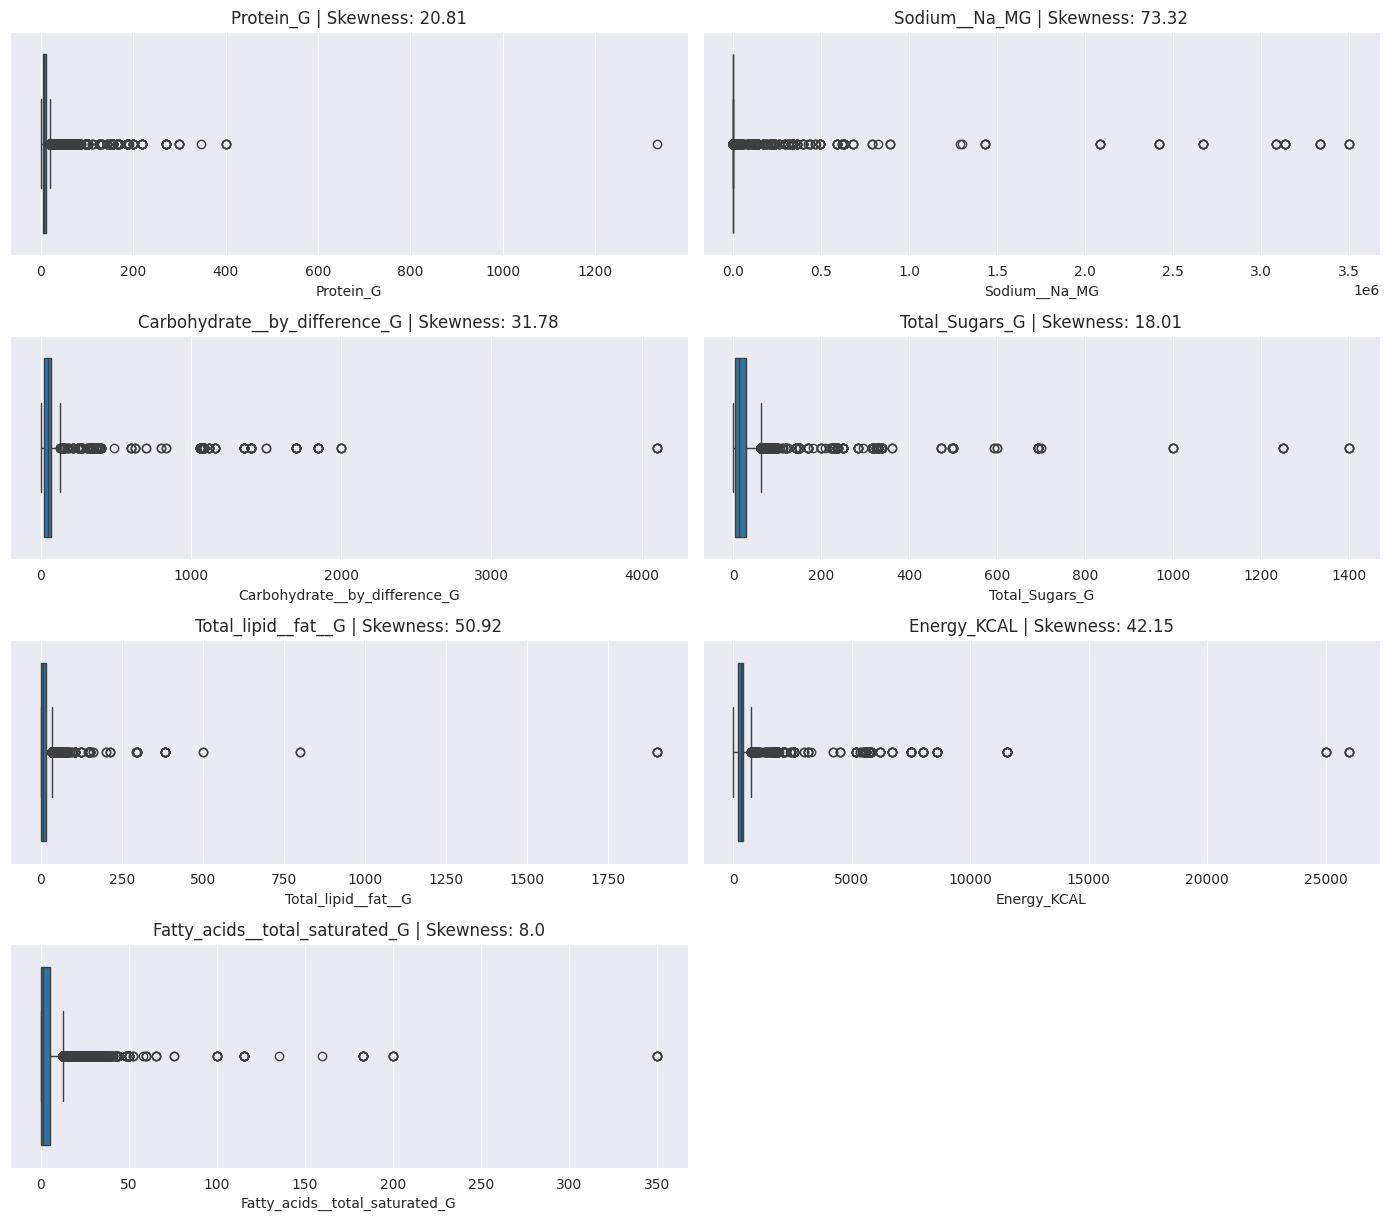

In [21]:
#Creating box plots for numerical column 1
sns.set_style("darkgrid")
numerical_columns = numerical_columns_1
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(x=df_for_correlation[feature])
    plt.title(f"{feature} | Skewness: {round(df_for_correlation[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

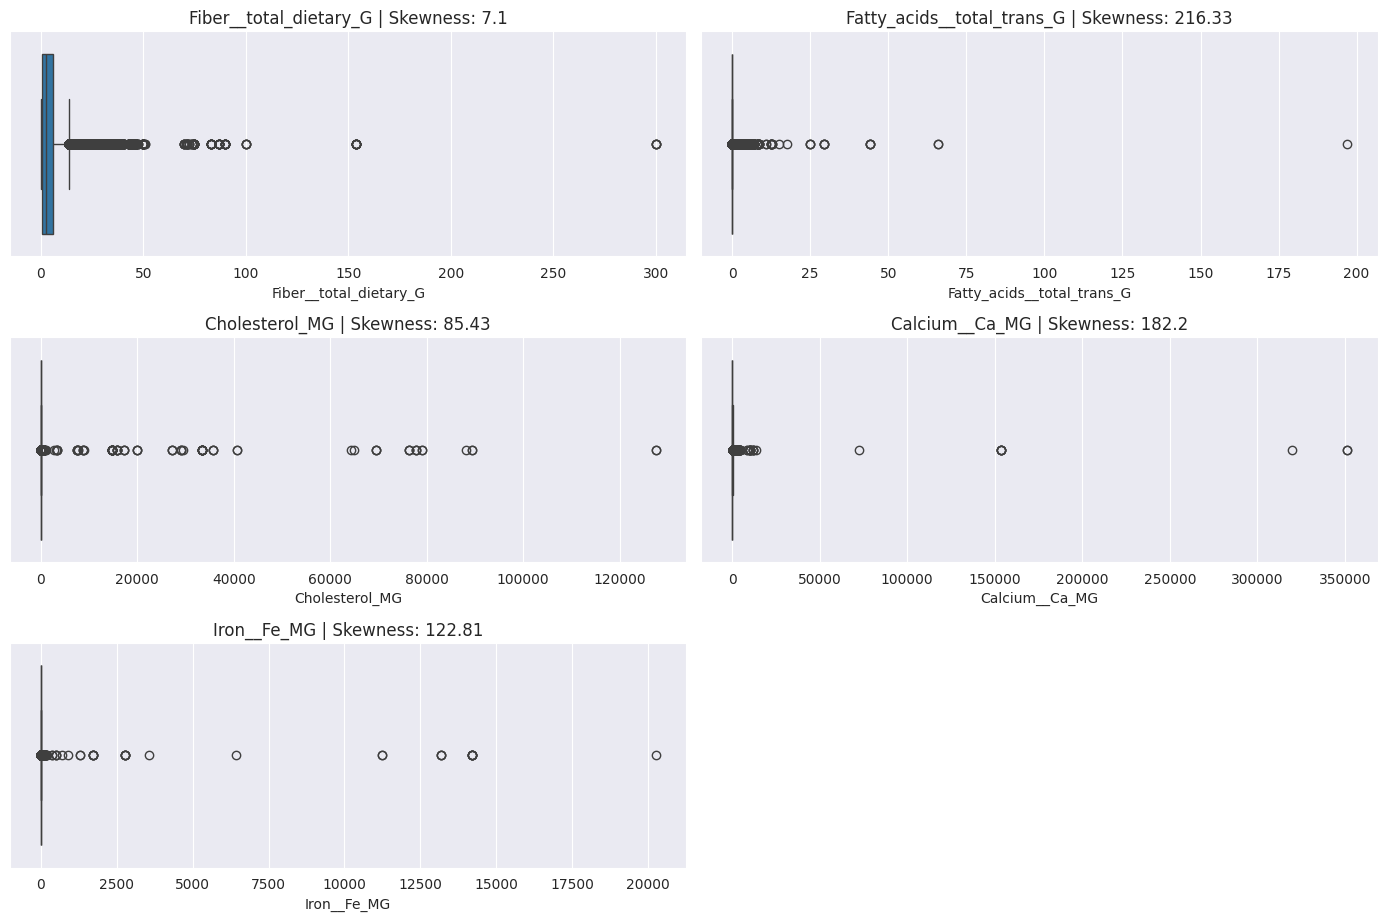

In [22]:
#Creating box plots for numerical column 2
sns.set_style("darkgrid")
numerical_columns = numerical_columns_2
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(x=df_for_correlation[feature])
    plt.title(f"{feature} | Skewness: {round(df_for_correlation[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

<i>The above box plots indicate that almost all numerical columns are heavily skewed to the right, which indicates the potential to remove outliers from these columns. Creating histograms for these numerical columns to confim this understanding<br>

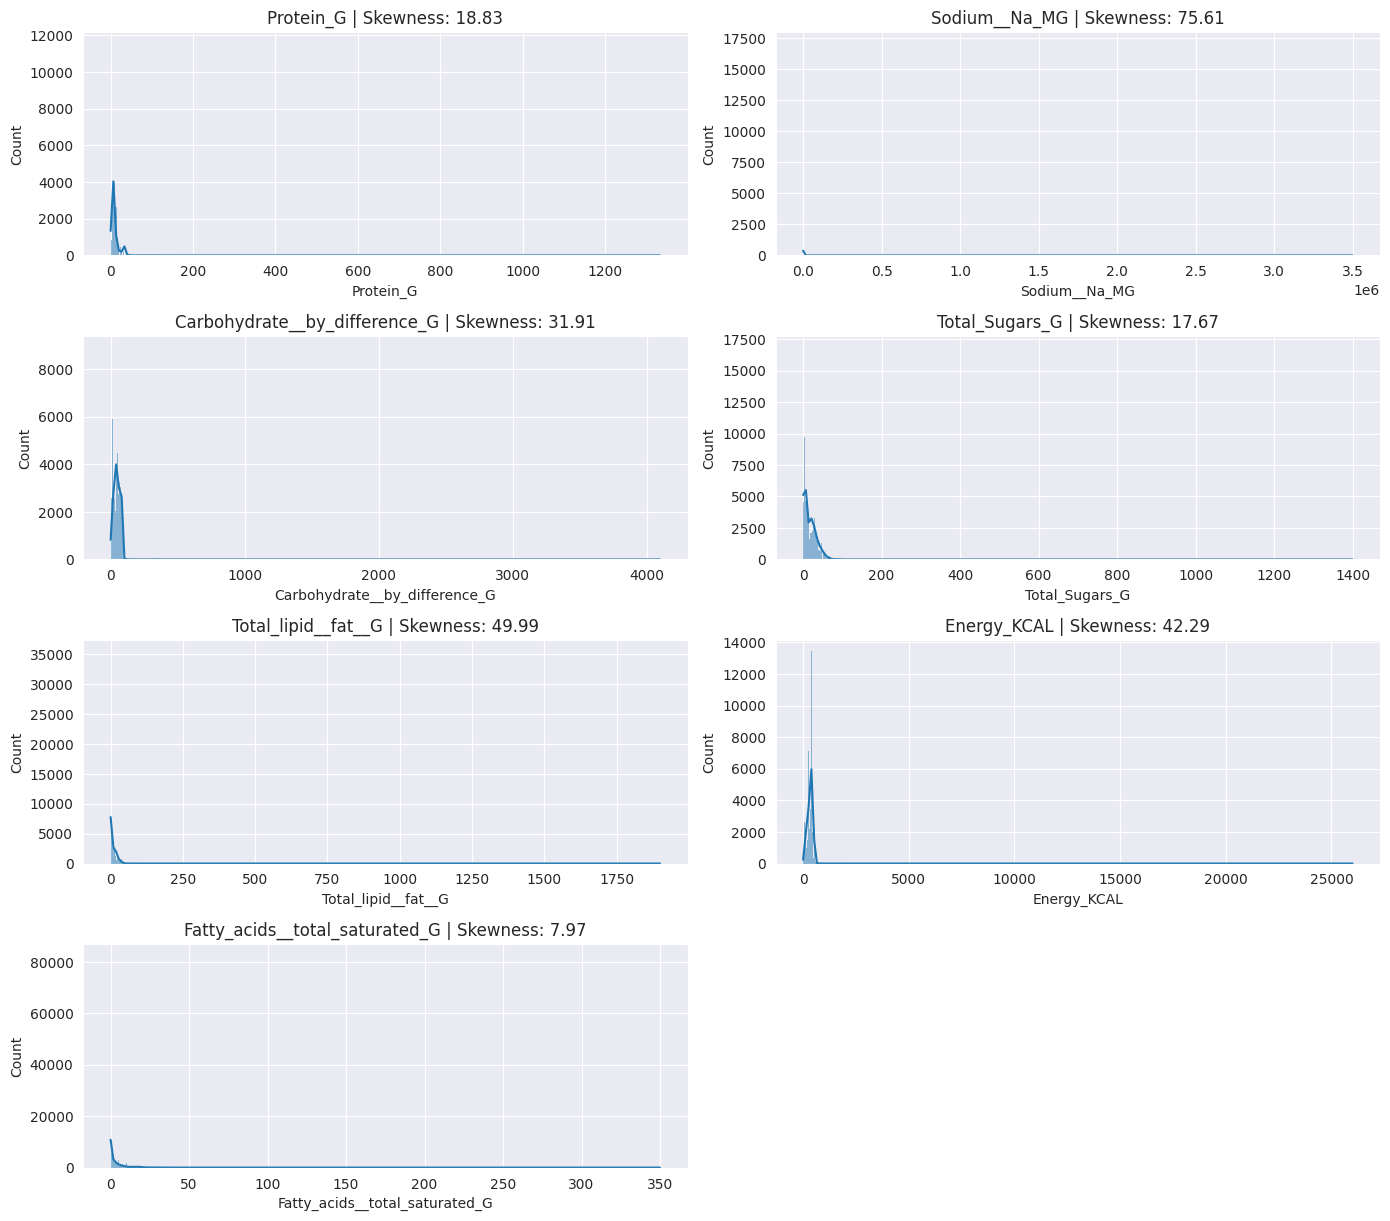

In [49]:
#Histogram plots for numerical column 1
sns.set_style("darkgrid")
numerical_columns = numerical_columns_1
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_for_correlation[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_for_correlation[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

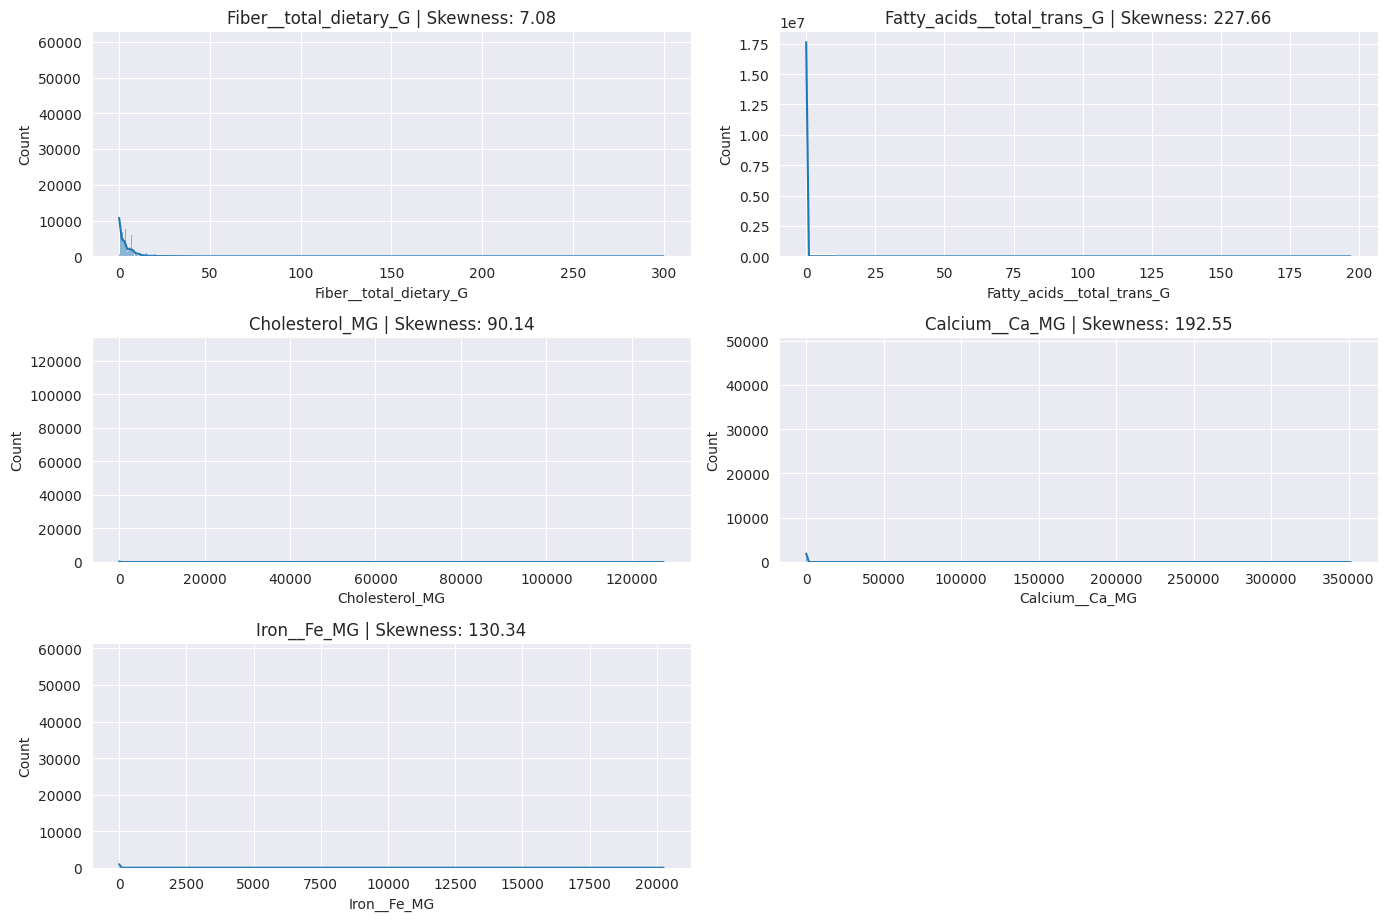

In [50]:
#Histogram plots for numerical column 2
sns.set_style("darkgrid")
numerical_columns = numerical_columns_2
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_for_correlation[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_for_correlation[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

<i><u>Step 3: Replace Missing Values in the Numerical Columns

<i> To replace the missing values, the strategy considered is to find the most frequent value for each combination of food category and serving size unit. This helps us have a more accurate replacement of missing values.<br><br>
For example, if a row that belongs to the Yogurt category has a missing energy value, then the most probable energy value would be the most frequent energy value observed across all Yogurts for the same serving size. If we only look at the food category, then there is a chance the most frequent value may belong to some other serving size unit which may lead to incorrect updates. And if we don't take the food category, then the energy value could be taken across other food categories which could introduce greater inaccuracies (e.g. Yogurt getting the energy value of Bread)

In [25]:
#Replace missing values for numerical columns with mode, grouping by food cateogry and serving size unit
get_mode = lambda x: x.mode()[0] if not x.mode().empty else np.nan
for col in numerical_columns_1:
    print("Column Name: " + col)
    print ("Number of NaNs before replacement: " + str(df_for_correlation[col].isna().sum()))
    df_for_correlation[col] = df_for_correlation[col].fillna(df_for_correlation.groupby(['branded_food_category','serving_size_unit'])[col].transform(get_mode))
    print ("Number of NaNs after replacement: " + str(df_for_correlation[col].isna().sum()))
    print("------------------------------------------------------------------------------")
for col in numerical_columns_2:
    print("Column Name: " + col)
    print ("Number of NaNs before replacement: " + str(df_for_correlation[col].isna().sum()))
    df_for_correlation[col] = df_for_correlation[col].fillna(df_for_correlation.groupby(['branded_food_category','serving_size_unit'])[col].transform(get_mode))
    print ("Number of NaNs after replacement: " + str(df_for_correlation[col].isna().sum()))
    print("------------------------------------------------------------------------------")

print(df_for_correlation.isna().sum())

Column Name: Protein_G
Number of NaNs before replacement: 12309
Number of NaNs after replacement: 3
------------------------------------------------------------------------------
Column Name: Sodium__Na_MG
Number of NaNs before replacement: 12688
Number of NaNs after replacement: 3
------------------------------------------------------------------------------
Column Name: Carbohydrate__by_difference_G
Number of NaNs before replacement: 12739
Number of NaNs after replacement: 3
------------------------------------------------------------------------------
Column Name: Total_Sugars_G
Number of NaNs before replacement: 13342
Number of NaNs after replacement: 3
------------------------------------------------------------------------------
Column Name: Total_lipid__fat__G
Number of NaNs before replacement: 13500
Number of NaNs after replacement: 3
------------------------------------------------------------------------------
Column Name: Energy_KCAL
Number of NaNs before replacement: 14029


<i><u>Step 4: Drop Outliers where Applicable

<i> Now that the numerical columns do not have many missing values, the next step is to drop outliers where possible to make the dataset more suitable for model building.<br><br>
<i>For this, the z-score method will be used where z-scores not falling between -3 and +3 will be dropped from the dataset. 

In [26]:
#Dropping outliers
numerical_columns = numerical_columns_1
#Calculate the z-score for Price and add it as a column
df_correlations_without_outliers = df_for_correlation.copy()
for col in numerical_columns:
    z_col = "z_" + col
    df_correlations_without_outliers[z_col] = (df_correlations_without_outliers[col] - df_correlations_without_outliers[col].mean())/(df_correlations_without_outliers[col].std())
#Retain only those values that has an absolute z-score value of 3 or less
    rows_dropped = len(df_correlations_without_outliers[df_correlations_without_outliers[z_col].abs() > 3])
    print (f"{rows_dropped:d} rows will be dropped when removing outliers in column {col}")
    df_correlations_without_outliers = df_correlations_without_outliers[df_correlations_without_outliers[z_col].abs() <= 3].drop(z_col,axis=1)
    print("Number of rows after remaining outliers in column " + col + ": " + str(len(df_correlations_without_outliers)))
    print("---------------------------------------")

numerical_columns = numerical_columns_2
for col in numerical_columns:
    z_col = "z_" + col
    df_correlations_without_outliers[z_col] = (df_correlations_without_outliers[col] - df_correlations_without_outliers[col].mean())/(df_correlations_without_outliers[col].std())
#Retain only those values that has an absolute z-score value of 3 or less
    rows_dropped = len(df_correlations_without_outliers[df_correlations_without_outliers[z_col].abs() > 3])
    print (f"{rows_dropped:d} rows will be dropped when removing outliers in column {col}")
    df_correlations_without_outliers = df_correlations_without_outliers[df_correlations_without_outliers[z_col].abs() <= 3].drop(z_col,axis=1)
    print("Number of rows after remaining outliers in column " + col + ": " + str(len(df_correlations_without_outliers)))
    print("---------------------------------------")

df_correlations_without_outliers.isna().any(axis=1).sum()

1264 rows will be dropped when removing outliers in column Protein_G
Number of rows after remaining outliers in column Protein_G: 211251
---------------------------------------
194 rows will be dropped when removing outliers in column Sodium__Na_MG
Number of rows after remaining outliers in column Sodium__Na_MG: 211057
---------------------------------------
67 rows will be dropped when removing outliers in column Carbohydrate__by_difference_G
Number of rows after remaining outliers in column Carbohydrate__by_difference_G: 210990
---------------------------------------
1661 rows will be dropped when removing outliers in column Total_Sugars_G
Number of rows after remaining outliers in column Total_Sugars_G: 209329
---------------------------------------
1662 rows will be dropped when removing outliers in column Total_lipid__fat__G
Number of rows after remaining outliers in column Total_lipid__fat__G: 207667
---------------------------------------
17 rows will be dropped when removing ou

np.int64(0)

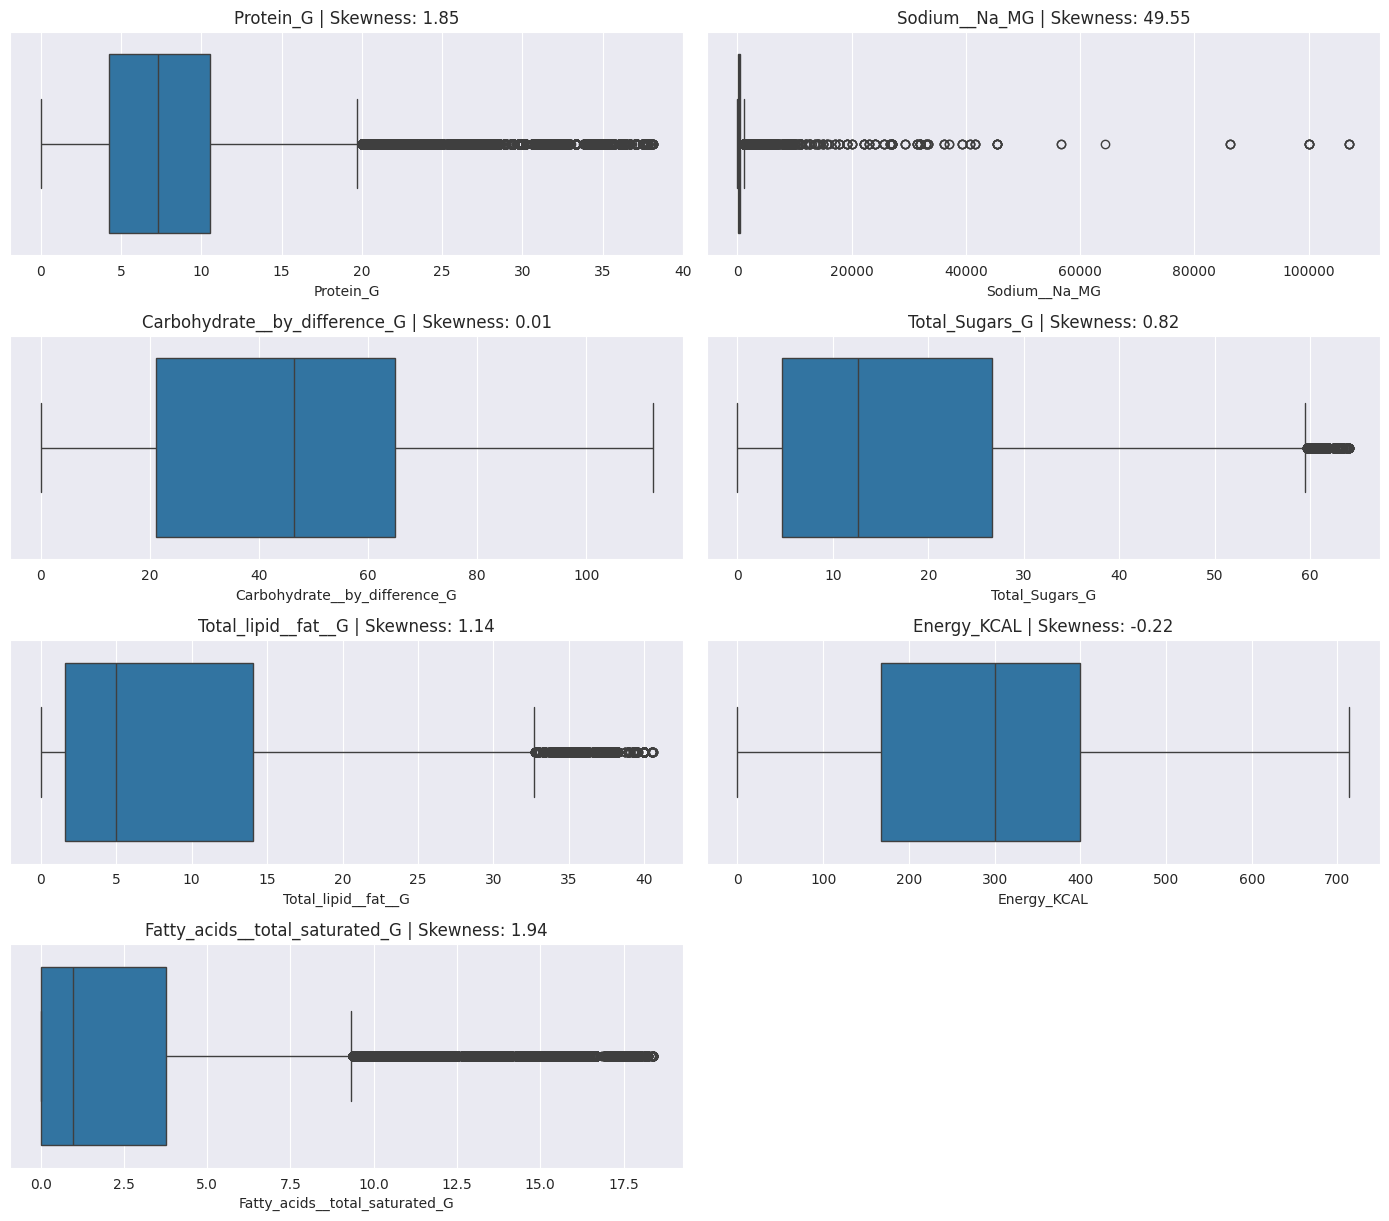

In [27]:
#Review boxplots of all columns to verify if outlier removal helped
sns.set_style("darkgrid")
numerical_columns = numerical_columns_1
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(x=df_correlations_without_outliers[feature])
    plt.title(f"{feature} | Skewness: {round(df_correlations_without_outliers[feature].skew(), 2)}")

plt.tight_layout()
plt.show()


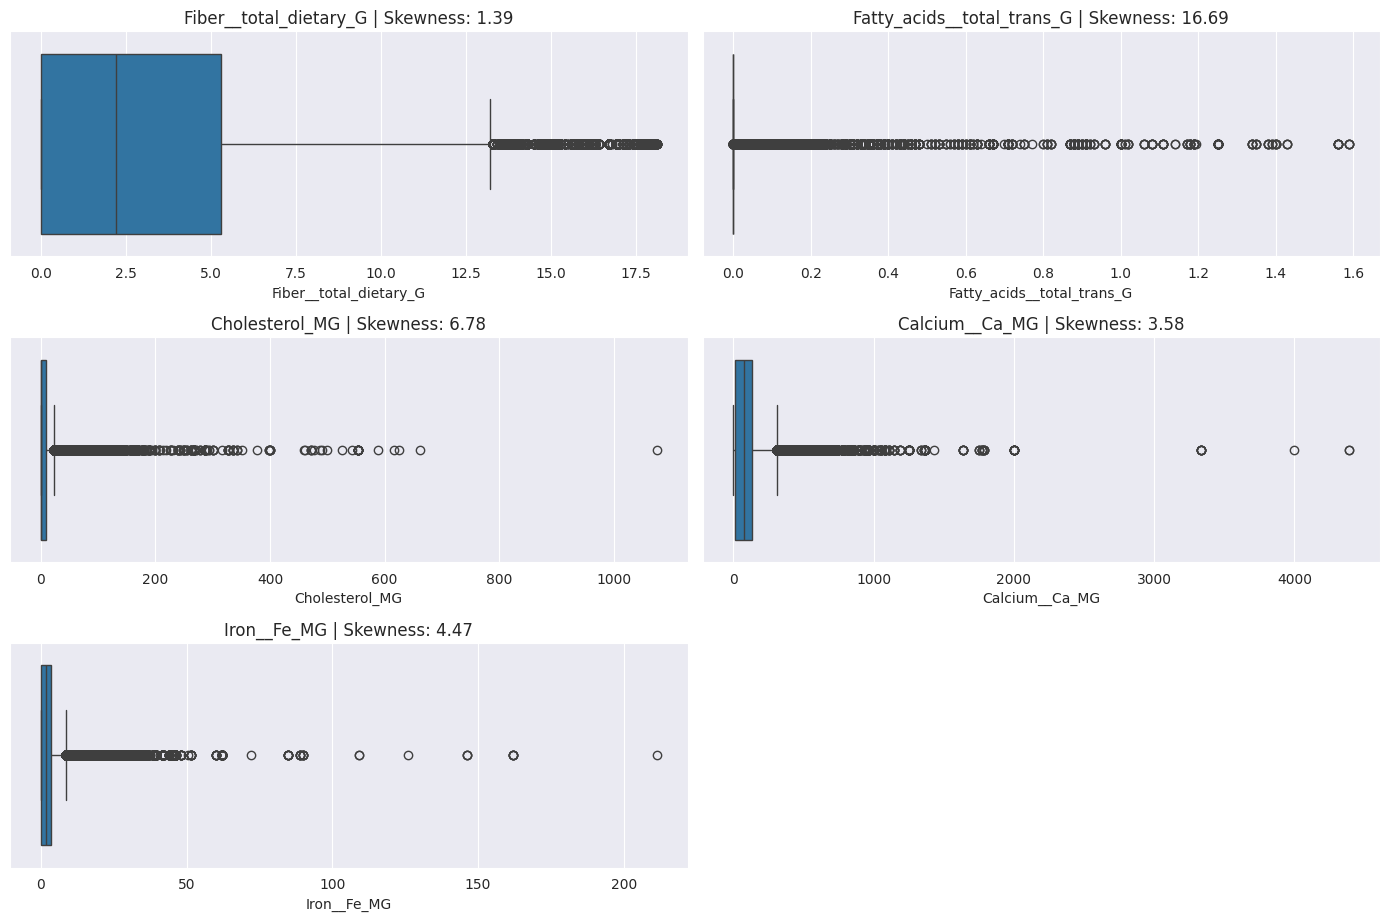

In [28]:
#Review boxplots of all columns to verify if outlier removal helped
sns.set_style("darkgrid")
numerical_columns = numerical_columns_2
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(x=df_correlations_without_outliers[feature])
    plt.title(f"{feature} | Skewness: {round(df_correlations_without_outliers[feature].skew(), 2)}")

plt.tight_layout()
plt.show()


<i> The above box plots indicate that the z-score approach helped remove outliers to make the data more normally distributed - however the columns still have right skews. We can retain this for now.

### d) Build Correlation Matrix

<i><u> Step 1: Check how columns correlate with the target energy column

<i> Since our first objective is to build a model that can predict the energy levels based on nutrient composition, the below snippet looks at how different columns correlate with the energy column (Energy_KCAL)<br><br>
<i> While the serving_size_unit categorical column will be dropped (since it should vary proportionally with energy for a particular category), the branded food category can be one hot encoded to see if we can see any correlation patterns between specific food categories and energy<br>

In [29]:
#To check correlation between certain features, we can also do a pair plot
df_for_correlation_updated = df_correlations_without_outliers.drop(['serving_size_unit'],axis=1)
df_for_correlation_encoded = pd.get_dummies(df_for_correlation_updated, columns=['branded_food_category'], drop_first=True, dtype=int)
df_for_correlation_updated = df_for_correlation_updated.drop(['branded_food_category'],axis=1)
correlations = df_for_correlation_encoded.corrwith(df_for_correlation_encoded['Energy_KCAL'])
print(correlations.sort_values(ascending=False))

Energy_KCAL                                                              1.000000
Carbohydrate__by_difference_G                                            0.769142
Total_lipid__fat__G                                                      0.694443
Total_Sugars_G                                                           0.486308
Fatty_acids__total_saturated_G                                           0.479831
Fiber__total_dietary_G                                                   0.478555
branded_food_category_Snack, Energy & Granola Bars                       0.393841
Protein_G                                                                0.330015
Iron__Fe_MG                                                              0.323562
branded_food_category_Cereal                                             0.227059
branded_food_category_Cookies & Biscuits                                 0.192289
branded_food_category_Chips, Pretzels & Snacks                           0.174657
branded_food_cat


<i> We can see that the carbohydrate and lipid fat columns have a high correlation with the energy column, with sugars, fatty acids and fibers have around 40-50% correlation. While serving size's negative correlation to energy is expected, tt is  interesting to note that Yogurt has a strong negative correlation with Energy. Most food categories however show very low correlation with energy - hence the branded food category column can be removed for now.

<i> The below code prints the correlation matrix for our columns of interest

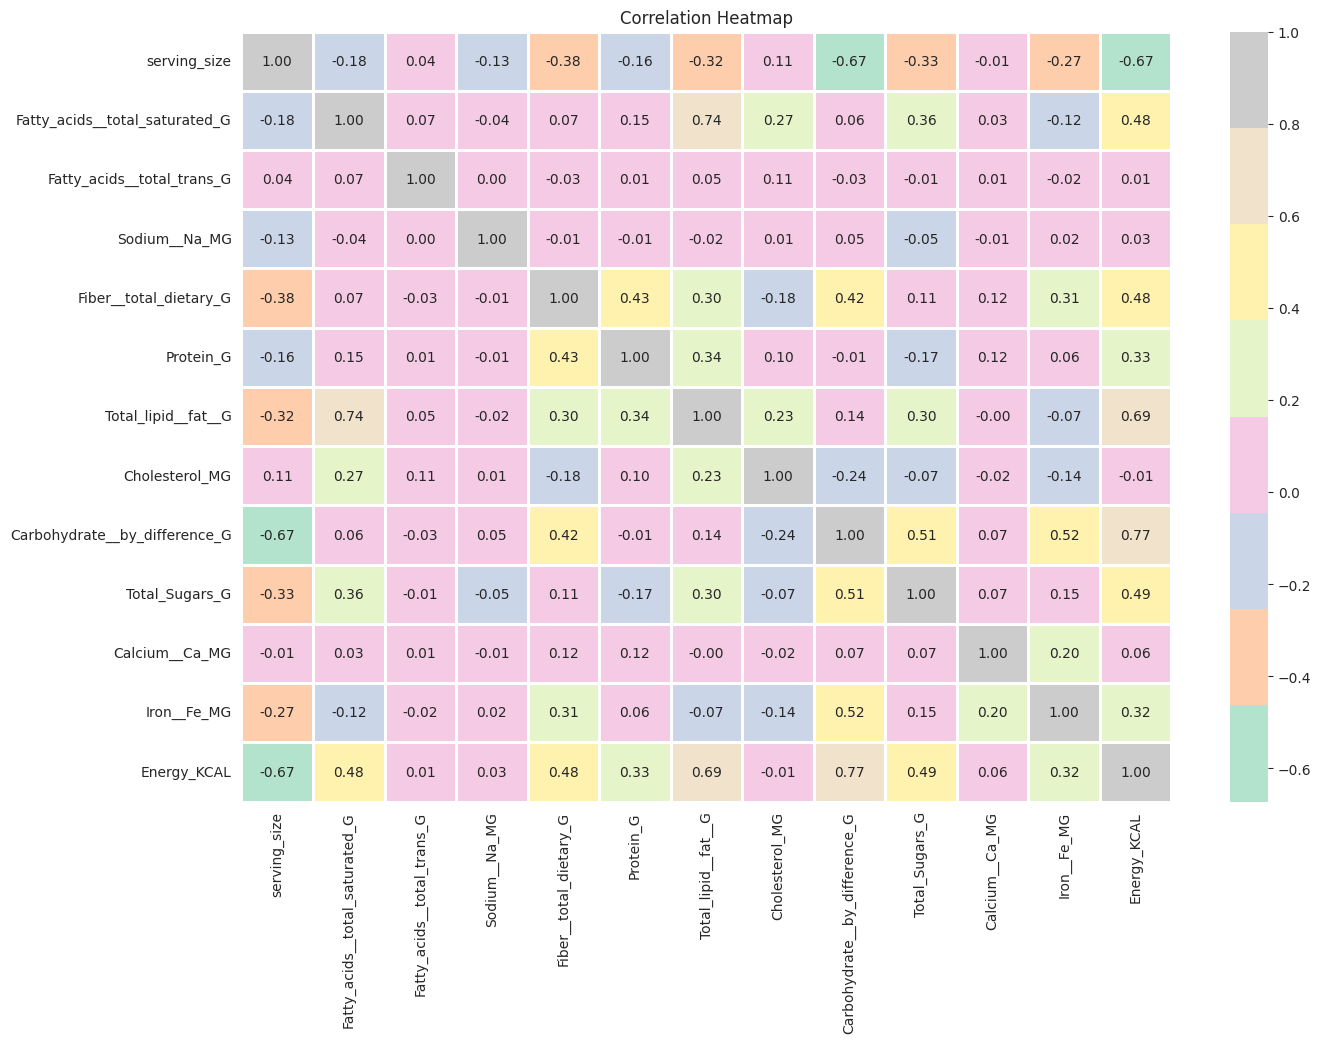

In [30]:
plt.figure(figsize=(15, 10))

sns.heatmap(df_for_correlation_updated.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

## Section 7: Building a Baseline Model [Phase 3]

### a) Decide the Baseline Modeling Approach

<i>To build the baseline model, a linear regression approach will be used. The dataset will be split into test and training data after which the model will be trained on training data and validated using test data. The performance of the mode will then be evaulated based on the coefficient of determination score along with the MSE ( Mean Squared Error) and MAE (Mean Absolute Error) values.  

### b) Split Data into Test and Training Data

In [31]:
#Prep step: Prepare training and test dataset

print("Check: Number of Missing Values: " + str(df_for_correlation_updated.isna().any(axis=1).sum()))

#Drop price from the feature dataset
X = df_for_correlation_updated.drop(columns = ['Energy_KCAL'])
#Create the Y dataset (price values)
Y = df_for_correlation_updated['Energy_KCAL']
#Prepare the training and test datasets - assuming 30% of the data would be used to do tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)
X_train.head()


Check: Number of Missing Values: 0


,serving_size,Fatty_acids__total_saturated_G,Fatty_acids__total_trans_G,Sodium__Na_MG,Fiber__total_dietary_G,Protein_G,Total_lipid__fat__G,Cholesterol_MG,Carbohydrate__by_difference_G,Total_Sugars_G,Calcium__Ca_MG,Iron__Fe_MG
139253,28.0,0.00,0.0,464.0,7.1,10.71,0.00,0.0,39.29,3.57,0.0,2.57
189355,37.0,0.00,0.0,216.0,2.7,5.41,9.46,0.0,67.57,32.43,486.0,5.41
74777,62.0,2.42,0.0,113.0,0.0,8.06,3.23,8.0,25.81,22.58,161.0,0.48
142113,55.0,1.82,0.0,45.0,5.5,10.91,12.73,0.0,72.73,20.00,73.0,2.62
202987,40.0,0.00,0.0,425.0,2.5,5.00,1.25,0.0,87.50,47.50,275.0,12.75


### c) Conduct Linear Regression

In [32]:
def plot_graph(y_train,y_train_pred,y_test,y_test_pred):
    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns
    sns.scatterplot(x='Actual', y='Predicted', data=train_df, ax=axes[0])
    axes[0].plot([min(train_df['Actual']), max(train_df['Actual'])],
                 [min(train_df['Actual']), max(train_df['Actual'])],
                 color='red', linestyle='--')
    axes[0].set_title('Training Data: Predicted vs Actual')

    sns.scatterplot(x='Actual', y='Predicted', data=test_df, ax=axes[1])
    axes[1].plot([min(test_df['Actual']), max(test_df['Actual'])],
                 [min(test_df['Actual']), max(test_df['Actual'])],
                 color='red', linestyle='--')
    axes[1].set_title('Testing Data: Predicted vs Actual')
    plt.tight_layout()
    plt.show()

******* Linear Regression Results *********
Training:
Mean Squared Error: 676.1866546822644
Mean Absolute Error: 12.852036670154696
R-squared Score: 0.9656895281255292
Test:
Mean Squared Error: 690.5537560845216
Mean Absolute Error: 12.837011148984834
R-squared Score: 0.9647710160164836
*******************************************


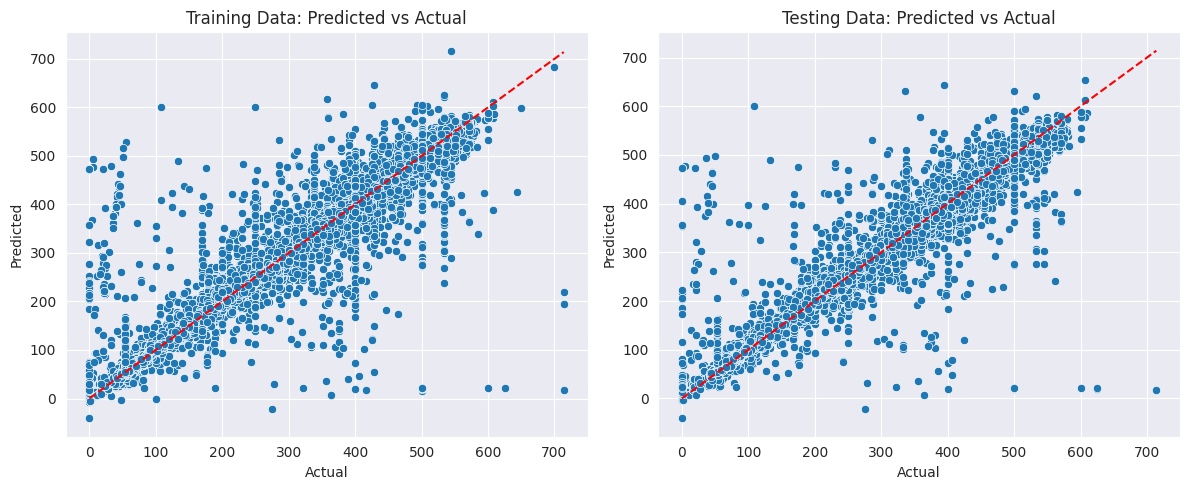

In [33]:
start_time = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])
model = pipeline.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
#See how the model predicts on training data
yPredict_Training = pipeline.predict(X_train)
#See how the model predicts on test data
yPredict_Test = pipeline.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

#Print regression error values
print ("******* Linear Regression Results *********")
print ("Training:")
print(f"Mean Squared Error: {mseTraining}")
print(f"Mean Absolute Error: {maeTraining}")
print(f"R-squared Score: {r2Training}")
print ("Test:")
print(f"Mean Squared Error: {mseTest}")
print(f"Mean Absolute Error: {maeTest}")
print(f"R-squared Score: {r2Test}")
print ("*******************************************")
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)


<i>The high coefficient of determination values for both training and test data indicates the linear regression model is able to do a good job of predicting trends on energy values based on individual nutrient columns. A low MAE of ~12 also indicates the model does a good job of predicting the energy values for the most part.<br><br>
<i> The MSE of 670+ and 690+ on training and test data is an interesting observation and shows that the model has the potential to throw a large error due the presence of outliers in the data. This is expected since the data we have is right skewed.<br><br>
<i> Hence there is an opportunity to evaluate other models that can handle skewed data better.

In [34]:
coefficients_list = pd.DataFrame(
    model[-1].coef_,
    columns=["Coefficients"],
    index=model[:-1].get_feature_names_out(),)
#Sort coefficients in decreasing order of their value
coefficients_list.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
Carbohydrate__by_difference_G,100.470221
Total_lipid__fat__G,76.576851
Protein_G,23.189526
Fatty_acids__total_saturated_G,1.430308
Sodium__Na_MG,0.790636
Cholesterol_MG,0.510188
Fatty_acids__total_trans_G,0.403312
Calcium__Ca_MG,-0.014142
Iron__Fe_MG,-1.106306
Total_Sugars_G,-2.452240


<i> Looking at the coefficients list, the energy values are predominantly influenced by carbohydrate, lipid and protein fields. It is interesting to note that fatty acids and total sugars don't have a major influence. It is also seen that serving size and total fiber quantity have a negative correlation with energy values</i>

## Section 8: Evaluating Additional Models (Phase 4a)

<i>Phase 4 is split into multiple sections. While section 8 targets the training of additional machine learning models on the same data, section 9 will select the target model based on accuracy and performance scores and conduct hyperparameter tuning on the model to make it more efficient.<br>

### a) Create a Dataframe to Store Results from Different Models

<i>Since we are evaluating multiple models using the linear regression findings as the baseline, a dataframe is created to store the MSE, MAE and R-squared values across these models.<br>

In [35]:

df_results = pd.DataFrame(columns=['Model', 'Training Time', 'MSE_Training','MAE_Training','R2_Training', 
                                  'MSE_Test','MAE_Test','R2_Test'])
df_results.loc[0] = ['Linear Regression',training_time,mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
df_results.head()

,Model,Training Time,MSE_Training,MAE_Training,R2_Training,MSE_Test,MAE_Test,R2_Test
0,Linear Regression,0.063996,676.186655,12.852037,0.96569,690.553756,12.837011,0.964771


### b) Evaluate Additional Models

<i><u> Model 1: Decision Tree Regression

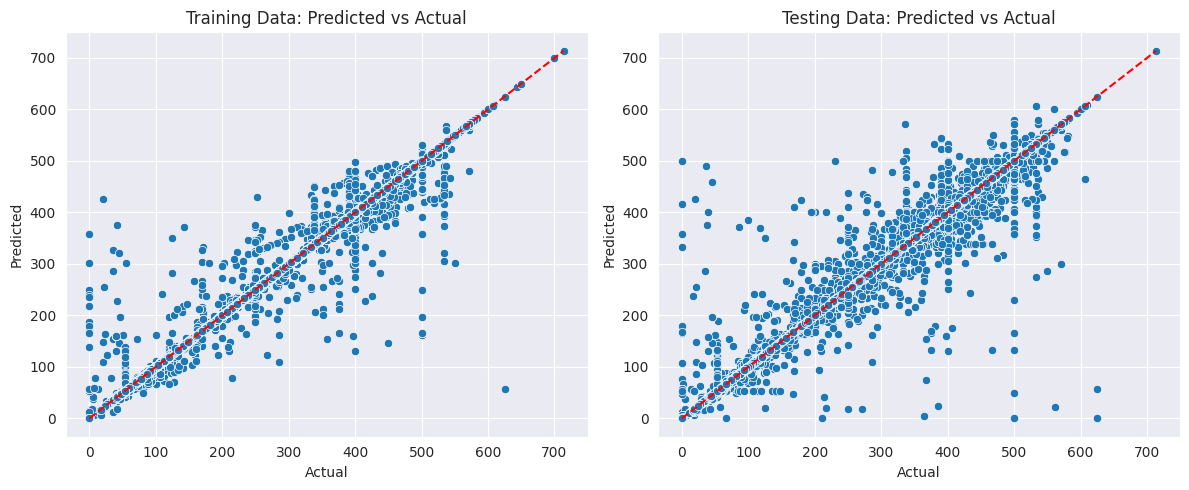

,Model,Training Time,MSE_Training,MAE_Training,R2_Training,MSE_Test,MAE_Test,R2_Test
0,Linear Regression,0.063996,676.186655,12.852037,0.965690,690.553756,12.837011,0.964771
1,Decision Tree Regression,0.740073,62.920444,0.720777,0.996807,207.814027,2.027799,0.989398


In [36]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('dt', DecisionTreeRegressor())])
model = pipeline.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
#See how the model predicts on training data
yPredict_Training = pipeline.predict(X_train)
#See how the model predicts on test data
yPredict_Test = pipeline.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

df_results.loc[len(df_results)] = ['Decision Tree Regression',training_time,mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)
df_results.head()

<i>The above graph, along with the MSE and R2 scores for decision tree regression show that it is doing a much better job at predicting the energy values from the nutrient profile than linear regression. While the test data scores also look very promising, decision tree regression tend to overfit the training data when there are no guardrails around its hyperparameters (e.g. max tree depth, number of leaf nodes etc). This needs to be factored when choosing the final model

<i><u> Model 2: K-Neighbors Regression

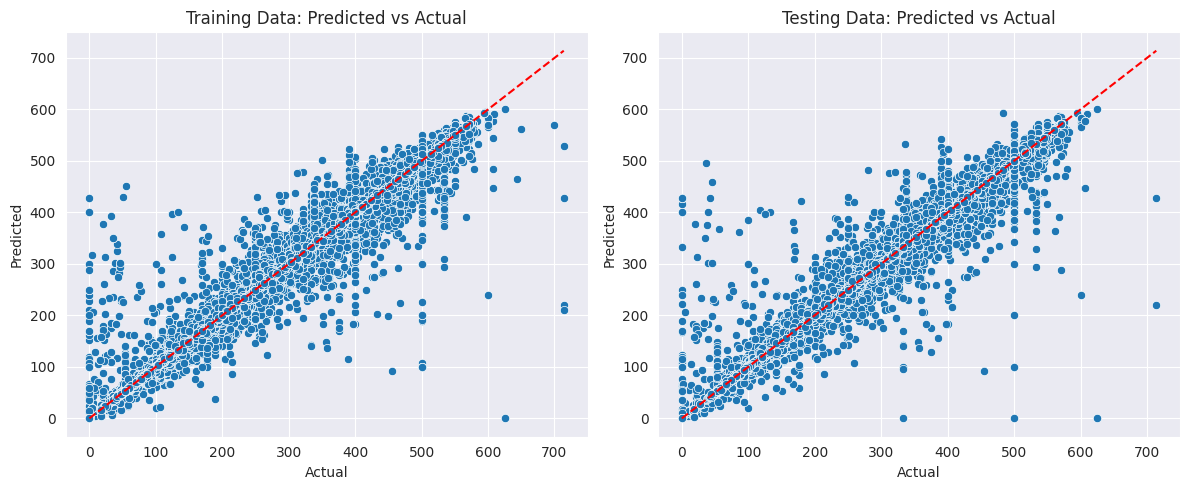

,Model,Training Time,MSE_Training,MAE_Training,R2_Training,MSE_Test,MAE_Test,R2_Test
0,Linear Regression,0.063996,676.186655,12.852037,0.965690,690.553756,12.837011,0.964771
1,Decision Tree Regression,0.740073,62.920444,0.720777,0.996807,207.814027,2.027799,0.989398
2,KNR,0.249907,187.403007,3.791969,0.990491,312.497983,5.483400,0.984058


In [37]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('knr', KNeighborsRegressor())])
model = pipeline.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
#See how the model predicts on training data
yPredict_Training = pipeline.predict(X_train)
#See how the model predicts on test data
yPredict_Test = pipeline.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

df_results.loc[len(df_results)] = ['KNR',training_time,mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)
df_results.head()

<i>The above results indicate that KNR is also performing much better than linear regression when looking at MSE and R-squared scores and comes very close to the decision tree regression model when it comes to the R-squared scores, even though decision tree regression still has better MSE scores.

<i><u> Model 3: Ridge

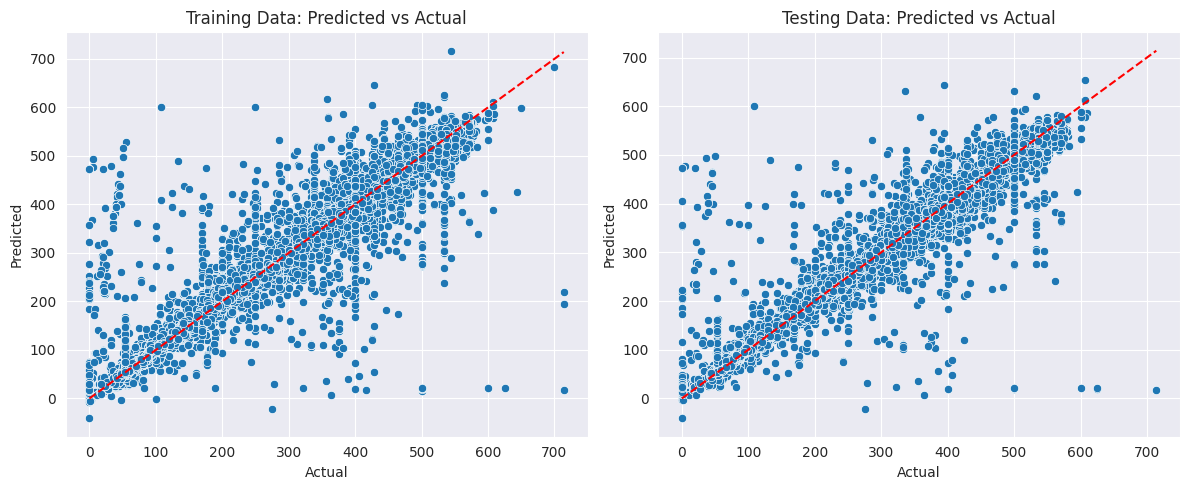

,Model,Training Time,MSE_Training,MAE_Training,R2_Training,MSE_Test,MAE_Test,R2_Test
0,Linear Regression,0.063996,676.186655,12.852037,0.965690,690.553756,12.837011,0.964771
1,Decision Tree Regression,0.740073,62.920444,0.720777,0.996807,207.814027,2.027799,0.989398
2,KNR,0.249907,187.403007,3.791969,0.990491,312.497983,5.483400,0.984058
3,Ridge,0.024585,676.186657,12.852324,0.965690,690.552414,12.837281,0.964771


In [38]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('ridge', Ridge())])
model = pipeline.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
#See how the model predicts on training data
yPredict_Training = pipeline.predict(X_train)
#See how the model predicts on test data
yPredict_Test = pipeline.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

df_results.loc[len(df_results)] = ['Ridge',training_time,mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)
df_results.head()

<i> The scores from Ridge are similar to linear regression here, which indicates that adding L2 regularization to linear regression does not bring a significant improvement 

<i><u> Model 4: Random Forest Regression

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


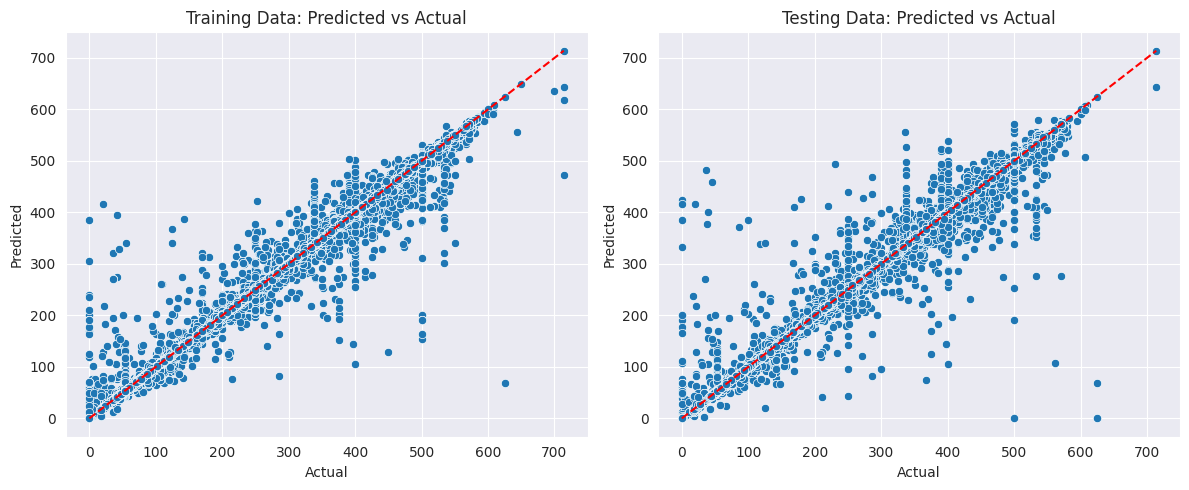

,Model,Training Time,MSE_Training,MAE_Training,R2_Training,MSE_Test,MAE_Test,R2_Test
0,Linear Regression,0.063996,676.186655,12.852037,0.965690,690.553756,12.837011,0.964771
1,Decision Tree Regression,0.740073,62.920444,0.720777,0.996807,207.814027,2.027799,0.989398
2,KNR,0.249907,187.403007,3.791969,0.990491,312.497983,5.483400,0.984058
3,Ridge,0.024585,676.186657,12.852324,0.965690,690.552414,12.837281,0.964771
4,Random Forest,5.388608,78.685902,1.412735,0.996007,181.207822,2.627052,0.990756


In [39]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('random_forest', RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True))])
model = pipeline.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
#See how the model predicts on training data
yPredict_Training = pipeline.predict(X_train)
#See how the model predicts on test data
yPredict_Test = pipeline.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

df_results.loc[len(df_results)] = ['Random Forest',training_time,mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)
df_results.head()

<i> Random Forest regression is an ensemble learning method which combines multiple decision trees to make predictions, thereby using 'wisdom of the crowd' to reduce overfitting and enhance accuracy. While the training and test scores (MSE and R-squared) are very close to decision tree scores, it shows a slight improvement over decision tree on the scores in the test data which reinforces the model's ability to reduce overfitting caused by decision trees.

<i><u> Model 5: SVR (Support Vector Regression)

<i>**This model did not complete its execution with an 8 vCPU, 32 GB RAM VM. Hence while the code below is being retained to illustrate how SVR will be used, it will not be used for further analysis

In [ ]:
#Train the model and capture time taken
start_time = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svr', SVR())])
model = pipeline.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
#See how the model predicts on training data
yPredict_Training = pipeline.predict(X_train)
#See how the model predicts on test data
yPredict_Test = pipeline.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

df_results.loc[len(df_results)] = ['SVR',training_time,mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)
df_results.head()

## Section 9: Target Model and Hyperparameter Tuning (Phase 4b)

### Target Model of Choice


<i>From the above models, the random forest regression model seems to be the best option due to the following reasons:<br><br>
a) It had the best MSE and R-squared scores for test data when compared to the other models, even though decision tree regression had slightly better scores on training data<br><br>
b) Random forest inherently reduces overfitting since its an ensemble method leveraging multiple decision trees, averaging the prediction of invididual trees.<br><br>
<i>While voting regressor can also be considered as an option to evaluate, it will not bring a significant change in the results considering the low MSE scores shown by random forest regression. Hence it is not being factored in this project

### Tune the Target Model

<i><u>a) Overview</u>


<i> While random forest regression model helps reduce the overfitting within decision tree regression models, it still may tend to show overfitting when there are no guardrails set around the hyperparameters. Hence this section tunes the hyperparameters of the random forest regression model - the section also does a hyperparameter tuning of the ridge regression model as a baseline<br><br>
<i>For random forest regression, the below hyperparameters will be tuned:<br>
a) n_estimators: Controls the number of decision trees in the forest. Higher values generally improve performance and reduce overfitting, but increases computation time.<br>
b) max_depth: Limits the depth of each decision tree - deeper trees can capture more complex data  relationships but are prone to overfitting.<br>
c) min_samples_leaf: Shows minimum number of samples that must be present in a leaf node. Smaller values can lead to overfitting, and larger values can cause underfitting. <br>

<i>Since GridSearchCV by default does 5-fold cross validation, additional cross validation need not be done.


<i><u>b) Running GridSearchCV on Ridge Regression as a Baseline

In [40]:
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'ridge__fit_intercept': [True, False]    
}

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('ridge', Ridge())])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'ridge__alpha': 1.0, 'ridge__fit_intercept': True}


<i><u>c) Reviewing the Accuracy Scores post Hyperparameter Tuning (Ridge Regression)

******* GridSearchCV Results *********
Training:
Mean Squared Error: 676.1866574967626
Mean Absolute Error: 12.852324436533927
R-squared Score: 0.9656895279827183
Test:
Mean Squared Error: 690.552414306584
Mean Absolute Error: 12.837281138308152
R-squared Score: 0.9647710844680315
*******************************************


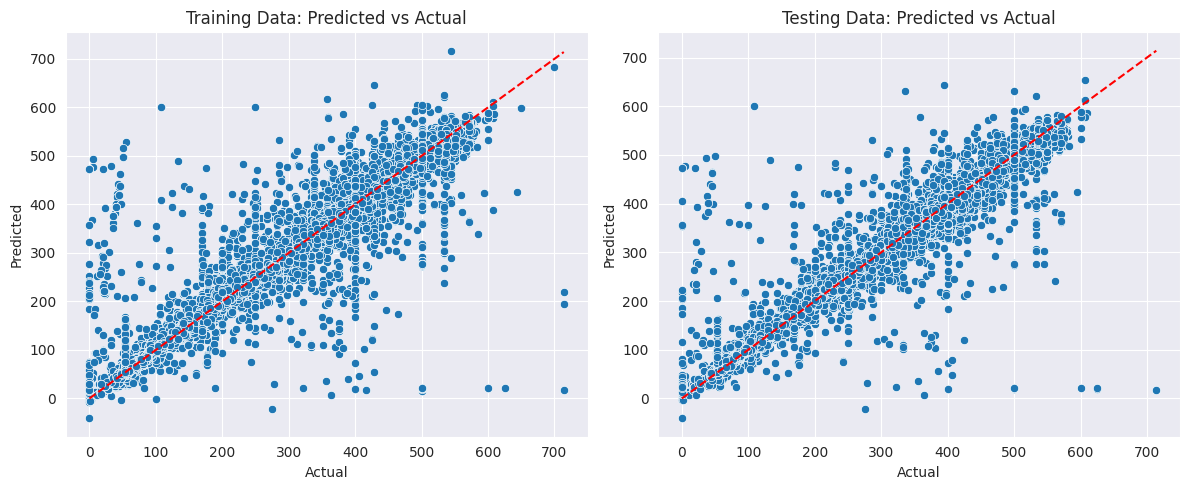

,Model,Training Time,MSE_Training,MAE_Training,R2_Training,MSE_Test,MAE_Test,R2_Test
0,Linear Regression,0.063996,676.186655,12.852037,0.965690,690.553756,12.837011,0.964771
1,Decision Tree Regression,0.740073,62.920444,0.720777,0.996807,207.814027,2.027799,0.989398
2,KNR,0.249907,187.403007,3.791969,0.990491,312.497983,5.483400,0.984058
3,Ridge,0.024585,676.186657,12.852324,0.965690,690.552414,12.837281,0.964771
4,Random Forest,5.388608,78.685902,1.412735,0.996007,181.207822,2.627052,0.990756
5,Optimized Ridge,NA,676.186657,12.852324,0.965690,690.552414,12.837281,0.964771


In [41]:
yPredict_Training = best_ridge_model.predict(X_train)
#See how the model predicts on test data
yPredict_Test = best_ridge_model.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

#Print regression error values
print ("******* GridSearchCV Results *********")
print ("Training:")
print(f"Mean Squared Error: {mseTraining}")
print(f"Mean Absolute Error: {maeTraining}")
print(f"R-squared Score: {r2Training}")
print ("Test:")
print(f"Mean Squared Error: {mseTest}")
print(f"Mean Absolute Error: {maeTest}")
print(f"R-squared Score: {r2Test}")
print ("*******************************************")

df_results.loc[len(df_results)] = ['Optimized Ridge',"NA",mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)
df_results.head(6)

<i><u>d) Running GridSearchCV on Random Forest Regression for Hyperparameter Tuning

In [42]:
param_grid = {
    'random_forest__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10],
    'random_forest__min_samples_leaf': [1, 2, 3, 4, 5],
    'random_forest__n_estimators': [50,100]
}

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('random_forest', RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True))])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
best_dtree_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__n_estimators': 100}


<i> The best model returned by GridSearchCV shows the below characteristics:<br>
a) max_depth as 10: The max_depth chosen by GridSearchCV was the maximum of the numbers in the list. Exceeding this could tend to overfitting.<br>
b) min_samples_leaf as 1: This again returend the minimum value in the list which may indicate potential overfitting<br>
c) n_estimators as 100: This chose the maximum value from the list which helps reduce overfitting<br>

<i>From the above, an optimal random forest regression model seems to be one that has a lot of decision trees (200 in this case), each of which is deep (10 in this case) and has at least 1 sample in a leaf node. While each decision tree may exhibit overfitting tendencies, the presence of a large number of trees helps reduce overfitting by averaging out the scores across multiple decision trees

<i><u>e) Reviewing the Accuracy Scores post Hyperparameter Tuning (Random Forest)

******* GridSearchCV Results *********
Training:
Mean Squared Error: 298.9215464923357
Mean Absolute Error: 9.513188136868065
R-squared Score: 0.9848323843090072
Test:
Mean Squared Error: 347.37441569361073
Mean Absolute Error: 9.891508330272002
R-squared Score: 0.982278500958214
*******************************************


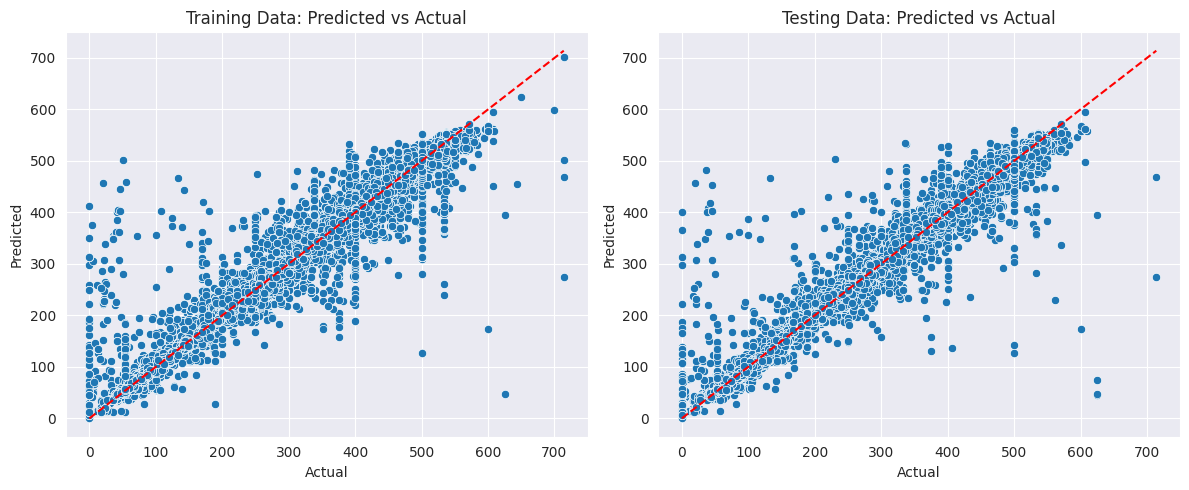

,Model,Training Time,MSE_Training,MAE_Training,R2_Training,MSE_Test,MAE_Test,R2_Test
0,Linear Regression,0.063996,676.186655,12.852037,0.965690,690.553756,12.837011,0.964771
1,Decision Tree Regression,0.740073,62.920444,0.720777,0.996807,207.814027,2.027799,0.989398
2,KNR,0.249907,187.403007,3.791969,0.990491,312.497983,5.483400,0.984058
3,Ridge,0.024585,676.186657,12.852324,0.965690,690.552414,12.837281,0.964771
4,Random Forest,5.388608,78.685902,1.412735,0.996007,181.207822,2.627052,0.990756
5,Optimized Ridge,NA,676.186657,12.852324,0.965690,690.552414,12.837281,0.964771
6,Optimized RF,NA,298.921546,9.513188,0.984832,347.374416,9.891508,0.982279


In [43]:
yPredict_Training = best_dtree_model.predict(X_train)
#See how the model predicts on test data
yPredict_Test = best_dtree_model.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(Y_train, yPredict_Training)
maeTraining = mean_absolute_error(Y_train, yPredict_Training)
r2Training = r2_score(Y_train, yPredict_Training)


#Calculate regression error metrics on test data
mseTest = mean_squared_error(Y_test, yPredict_Test)
maeTest = mean_absolute_error(Y_test, yPredict_Test)
r2Test = r2_score(Y_test, yPredict_Test)

#Print regression error values
print ("******* GridSearchCV Results *********")
print ("Training:")
print(f"Mean Squared Error: {mseTraining}")
print(f"Mean Absolute Error: {maeTraining}")
print(f"R-squared Score: {r2Training}")
print ("Test:")
print(f"Mean Squared Error: {mseTest}")
print(f"Mean Absolute Error: {maeTest}")
print(f"R-squared Score: {r2Test}")
print ("*******************************************")

df_results.loc[len(df_results)] = ['Optimized RF',"NA",mseTraining,maeTraining,r2Training,mseTest,maeTest,r2Test]
plot_graph(Y_train, yPredict_Training,Y_test,yPredict_Test)
df_results.head(7)

<i>With hyperparameter tuning, the MSE and R-squared values have increased and decreased respectively compared to the original model for both ridge and random forest regression models. The random forest model still looks to be the best bet looking at the revised MSE and R-squared values.<br>
<i>Note: KNR was not factored for hyperparameter tuning since it focuses on making predictions based on its nearest neighbors instead of finding explicit relationships between features.


## Section 10: Key Insights and Conclusion [Phase 5]

### a) Reviewing the Relative Importance of Features

<i><u>For Random Forest Regression

                           Feature  Importance
8    Carbohydrate__by_difference_G    0.718495
6              Total_lipid__fat__G    0.247177
5                        Protein_G    0.021913
3                    Sodium__Na_MG    0.003207
4           Fiber__total_dietary_G    0.002302
0                     serving_size    0.002139
9                   Total_Sugars_G    0.001937
10                  Calcium__Ca_MG    0.000807
1   Fatty_acids__total_saturated_G    0.000692
11                     Iron__Fe_MG    0.000661
7                   Cholesterol_MG    0.000651
2       Fatty_acids__total_trans_G    0.000018


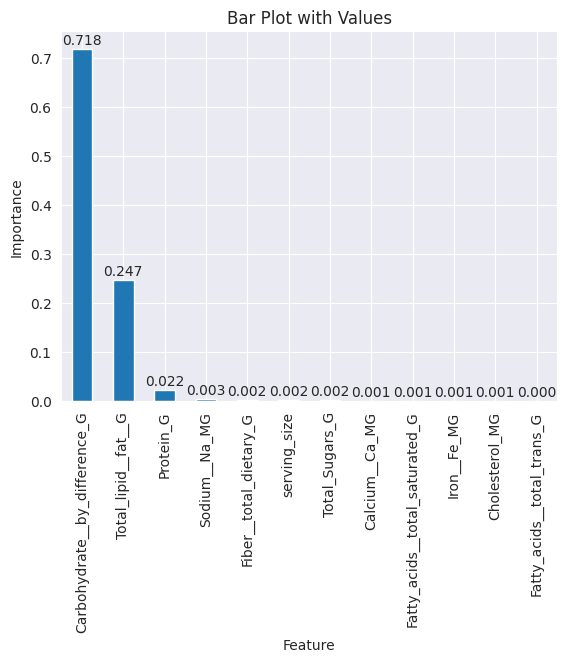

In [44]:
# Get feature importances
feature_importances = best_dtree_model.named_steps["random_forest"].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Create the bar plot
ax = feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)

for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.title('Bar Plot with Values')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

<i> The below inferences can be made based on the above output:<br>
a) While carbohydrate and lipid content has a very big say in the energy content of a food item, total sugars and cholesterol has very little influence even though they had very less percentage of null values originally (6% and 10% respectively). This could be because the values for sugars and cholesterol are themselves very small per serving size<br>
b) Protein and to a very small extent sodium has some importance when making energy value predictions<br>
c) It is interesting to see that serving size and fiber has very little influence at all on energy calculations in the random forest model. Logically, serving size would have had a positive correlation with energy values (larger the portion size, greater the energy) - but while this may be true for a specific food category, serving size may not be a good predictor for energy across food categories since energy per unit serving size would vary 

### b) Testing the Model on Real Food Label Examples

<i><u>Example 1 - Pretzel Packet

![Sample Image](https://www.kroger.com/product/images/large/top/0007797508215)


In [45]:
#https://images.app.goo.gl/VPqmPbSofEVE6AAU6
new_data = pd.DataFrame({
    'serving_size': [26],
    'Fatty_acids__total_saturated_G': [0],
    'Fatty_acids__total_trans_G': [0],
    'Sodium__Na_MG': [220],
    'Fiber__total_dietary_G': [1],
    'Protein_G': [2],
    'Total_lipid__fat__G': [0],
    'Cholesterol_MG': [0],
    'Carbohydrate__by_difference_G': [22],
    'Total_Sugars_G': [1],
    'Calcium__Ca_MG': [0],
    'Iron__Fe_MG': [0]
})

predictions = best_dtree_model.predict(new_data)
print("Predicted energy for the provided nutrient profile is: " + str(predictions))

Predicted energy for the provided nutrient profile is: [94.30378042]


<i><b> The predicted value (94.3 kCAL) from the tuned random forest regression model was lower than the actual value (100 kCAL) by 5.7 kCAL (5.7%)

<i><u>Example 2 - Salad Packet

![Sample Image](https://www.kroger.com/product/images/large/bottom/0007143001138)

In [46]:
#https://www.foodsco.net/p/dole-value-size-garden-salad/0007143001138
new_data = pd.DataFrame({
    'serving_size': [85],
    'Fatty_acids__total_saturated_G': [0],
    'Fatty_acids__total_trans_G': [0],
    'Sodium__Na_MG': [15],
    'Fiber__total_dietary_G': [1],
    'Protein_G': [1],
    'Total_lipid__fat__G': [0],
    'Cholesterol_MG': [0],
    'Carbohydrate__by_difference_G': [3],
    'Total_Sugars_G': [2],
    'Calcium__Ca_MG': [0],
    'Iron__Fe_MG': [0]
})

predictions = best_dtree_model.predict(new_data)
print("Predicted energy for the provided nutrient profile is: " + str(predictions))

Predicted energy for the provided nutrient profile is: [18.54968604]



<i><b> The predicted value (18.6 kCAL) from the tuned random forest regression model was higher than the actual value (15 kCAL) by 3.6 kCAL (24%)

<i><u>Example 3 - Frozen Pizza

![Sample Image](https://i5.walmartimages.com/asr/2cf9b314-d53d-4489-a741-48fe952834cc.fdf6f874790e4a053587c9ec947838dc.jpeg?odnHeight=800&odnWidth=800&odnBg=FFFFFF)

In [48]:
#https://www.foodsco.net/p/dole-value-size-garden-salad/0007143001138
new_data = pd.DataFrame({
    'serving_size': [136],
    'Fatty_acids__total_saturated_G': [7],
    'Fatty_acids__total_trans_G': [0],
    'Sodium__Na_MG': [710],
    'Fiber__total_dietary_G': [2],
    'Protein_G': [16],
    'Total_lipid__fat__G': [15],
    'Cholesterol_MG': [0],
    'Carbohydrate__by_difference_G': [36],
    'Total_Sugars_G': [4],
    'Calcium__Ca_MG': [250],
    'Iron__Fe_MG': [2.7]
})

predictions = best_dtree_model.predict(new_data)
print("Predicted energy for the provided nutrient profile is: " + str(predictions))

Predicted energy for the provided nutrient profile is: [338.44335176]


### c) Key Insights from the Exercise

<i>From the above exercise, the below insights can be inferred:<br>
<i>a) The energy values can be predicted from the nutrient information provided in the food labels with reasonable levels of accuracy<br>
<i>b) While most regression models were able to capture the variability in the energy values based on the nutrient profile to a great degree, random forest regression model exhibited the most optimal MSE (mean squared error) values on the test data<br>
<i>c) Carbohydrate and total lipid content were the most influential in predicting energy values, followed by protein<br>
<i>d) Serving size did not have a strong correlation with energy since different food types have different energy values per unit serving size<br>
<i>e) The predictions made from the tuned random forest model were reasonably close to the actual calorie values in the examples used, indicating that the nutrient information in the food label accounts for most of the variability in the energy values<br>
